# ANALYSIS - Mooring Heatwaves
Here I'm taking my first look at the mooring data from the ANMN. The key motivation for this is to understand how often MHWs occur over the entire along-shore extent of the coastline. We have observed in the ACCESS-OM2-01 model output, that MHWs are commonly found simulataneously from up around mid-QLD to southern VIC. The question is whether this is an artefact of the model, or whether we truly see this is observations. 

### 1. Load in data and explore the structure

In [3]:
import matplotlib.pyplot as plt
import cmocean as cm
import xarray as xr
import numpy as np
import glob
import xesmf

from matplotlib import patches
import cartopy.feature as cfeature
import matplotlib.lines as mlines
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
# import cartopy to plot maps
import cartopy.crs as ccrs
import cartopy.feature as feature
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from xgcm import Grid

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client(threads_per_worker=1)
client

<Client: 'tcp://127.0.0.1:43845' processes=4 threads=4, memory=16.00 GiB>

In [4]:
# set paths to model output
access = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/'
## EAC MOORING 
eac_mooring = '/scratch/v45/jr5971/eac-mooring/'
# ANMN MOORINGS
east_coast_mooring_path = '/scratch/v45/jr5971/imos-mooring-data/'

In [5]:
# import os
# os.chdir('/home/581/jr5971/jr5971/notebooks/')
# # from custom_funcs import *
from myfuncs import *

### 1. Load netcdf files

In [6]:
files = glob.glob(east_coast_mooring_path + '*GBROTE*SBE39*.nc')
files.sort()

len(files)

64

In [7]:
files

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20070915T083000Z_GBROTE_FV01_GBROTE-0709-SBE39-10_END-20080508T132500Z_C-20210330T001451Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20070915T083000Z_GBROTE_FV01_GBROTE-0709-SBE39-20_END-20080508T132500Z_C-20210330T001448Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20070915T083000Z_GBROTE_FV01_GBROTE-0709-SBE39-6_END-20080508T132500Z_C-20210330T001455Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20080508T103000Z_GBROTE_FV01_GBROTE-0805-SBE39-10_END-20081027T034000Z_C-20191010T022005Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20080508T103000Z_GBROTE_FV01_GBROTE-0805-SBE39-6_END-20081027T032500Z_C-20191010T022006Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20081028T230500Z_GBROTE_FV01_GBROTE-0810-SBE39-12.5_END-20090421T035900Z_C-20210330T005815Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20081028T230500Z_GBROTE_FV01_GB

In [15]:
ds_ls = []
for file in files:
    ds = xr.open_dataset(file)
    ds_daily = ds.resample(TIME='D').mean()

    ds_ls.append(ds_daily)

In [21]:
temp_ls = []
for file in files:
    da = xr.open_dataset(file)['TEMP']
    da_daily = da.resample(TIME='D').mean()

    temp_ls.append(da_daily)

In [23]:
temp_combined = xr.concat(temp_ls, dim='TIME')

(15.0, 40.0)

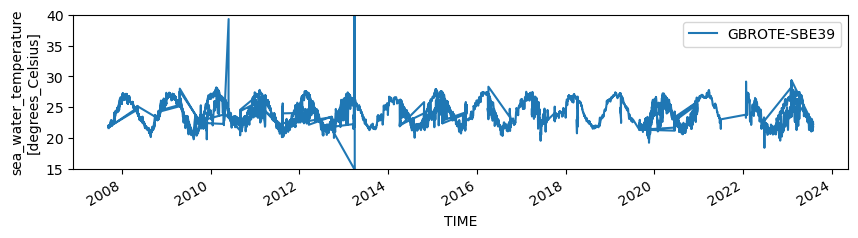

In [28]:
plt.figure(figsize=(10,2))
temp_combined.plot(label='GBROTE-SBE39')
plt.legend()
plt.ylim(15, 40)

In [22]:
temp_ls[0]

<xarray.DataArray 'TEMP' (TIME: 238)>
array([21.614656, 22.062471, 21.919367, 21.957802, 21.961174, 22.028261,
       22.061531, 22.055187, 22.028187, 22.014585, 21.998468, 22.029285,
       22.023508, 22.04766 , 22.040014, 22.087181, 22.304588, 22.46448 ,
       22.63873 , 22.561037, 22.58605 , 22.707352, 22.720518, 22.591108,
       22.30979 , 22.36889 , 22.338242, 22.380667, 22.412504, 22.56559 ,
       22.691666, 22.556118, 22.563013, 22.709038, 22.60224 , 22.509148,
       22.55384 , 22.584911, 22.574348, 22.608297, 22.6513  , 22.65163 ,
       22.822138, 22.823576, 22.791813, 23.067635, 23.298775, 23.308094,
       23.594284, 23.895561, 23.661089, 23.60884 , 23.632046, 24.059927,
       24.290886, 24.090878, 24.143515, 24.14736 , 24.144682, 24.151924,
       24.103897, 24.079472, 24.067566, 24.113503, 24.139988, 24.226688,
       24.454374, 24.511192, 24.563347, 24.612555, 24.472324, 24.569635,
       24.642794, 24.849586, 24.744728, 24.780859, 24.879839, 24.909164,
       24.57135 , 24.35854 , 24.583855, 24.765347, 24.927986, 25.19102 ,
       25.296505, 25.345823, 25.111582, 25.005491, 25.164461, 25.442146,
       25.686302, 25.876562, 26.134407, 26.120293, 26.127035, 25.936842,
       26.162666, 26.032604, 26.313143, 26.468346, 26.460657, 26.443115,
       26.322105, 25.991022, 25.959433, 25.79729 , 25.773283, 25.549353,
       25.816835, 26.080496, 26.154314, 26.281013, 26.298965, 26.333994,
       26.503696, 26.690147, 26.997551, 27.228464, 26.918993, 26.430672,
       26.20059 , 26.25456 , 26.29896 , 26.29718 , 26.3272  , 26.37689 ,
       26.414633, 26.440525, 26.404106, 26.540026, 26.519842, 26.499382,
       26.293785, 26.316914, 26.425264, 26.482336, 26.700106, 27.075989,
       26.970192, 26.862473, 26.636078, 26.61251 , 26.810814, 26.998104,
       26.890923, 26.689997, 26.884253, 26.920591, 26.72981 , 27.11341 ,
       27.05564 , 26.582632, 26.58586 , 26.418938, 26.229734, 26.137337,
       25.956522, 25.764338, 25.570616, 25.78693 , 25.758415, 25.771461,
       25.870522, 26.105225, 26.391487, 26.512787, 26.487772, 26.513557,
       26.789719, 26.818699, 26.637762, 26.494972, 26.376411, 26.196032,
       25.99394 , 25.96621 , 25.906584, 25.904268, 25.950823, 25.941067,
       25.824701, 25.806097, 25.815277, 25.761332, 25.695286, 25.66669 ,
       25.65192 , 25.609884, 25.512007, 25.593536, 25.668455, 25.735634,
       25.725197, 25.668922, 25.685905, 25.741774, 25.755806, 25.876406,
       25.658882, 25.742992, 25.638096, 25.60171 , 25.312122, 25.302616,
       25.213472, 25.083183, 25.015871, 24.959875, 24.763958, 24.79435 ,
       24.896341, 24.917213, 24.886288, 24.855892, 24.934776, 24.929909,
       25.005028, 24.775023, 24.752634, 24.75392 , 24.843534, 24.821215,
       24.880445, 24.941456, 24.893738, 24.831497, 24.842422, 24.901114,
       24.782013, 24.546297, 24.357506, 24.275265, 24.320778, 24.344742,
       24.256168, 24.13988 , 24.107456, 24.618586], dtype=float32)
Coordinates:
    LATITUDE       float64 -23.48
    LONGITUDE      float64 152.2
    NOMINAL_DEPTH  float32 10.0
  * TIME           (TIME) datetime64[ns] 2007-09-14 2007-09-15 ... 2008-05-08
Attributes:
    ancillary_variables:  TEMP_quality_control
    long_name:            sea_water_temperature
    standard_name:        sea_water_temperature
    units:                degrees_Celsius
    valid_max:            40.0
    valid_min:            -2.5

In [11]:
# Downsample xarray object ...
ds_0 = ds_ls[0]
ds_0_daily = ds_0.resample(TIME='D').mean()
ds_0_daily

<xarray.Dataset>
Dimensions:                (TIME: 238)
Coordinates:
    LATITUDE               float64 -23.48
    LONGITUDE              float64 152.2
    NOMINAL_DEPTH          float32 10.0
  * TIME                   (TIME) datetime64[ns] 2007-09-14 ... 2008-05-08
Data variables:
    TEMP                   (TIME) float32 21.61 22.06 21.92 ... 24.11 24.62
    TEMP_quality_control   (TIME) float32 4.0 2.062 1.0 1.0 ... 1.0 1.0 1.652
    DEPTH                  (TIME) float32 4.853 10.7 10.68 ... 11.29 11.25 8.342
    DEPTH_quality_control  (TIME) float32 4.0 2.062 1.0 1.0 ... 1.0 1.0 1.783
    TIMESERIES             (TIME) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (12/56)
    abstract:                      The Queensland and Northern Australia moor...
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Australian Institute of Marine Science
    author_email:                  adc@aims.gov.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    ...                            ...
    time_deployment_end_origin:    TimeLastGoodData
    time_deployment_start:         2007-09-15T08:30:00Z
    time_deployment_start_origin:  TimeFirstGoodData
    title:                         IMOS One Tree East Mooring. Deployed  - 15...
    toolbox_input_file:            /export/imos/Processed/QIMOS/GBROTE/GBROTE...
    toolbox_version:               2.6.10 - GLNXA64

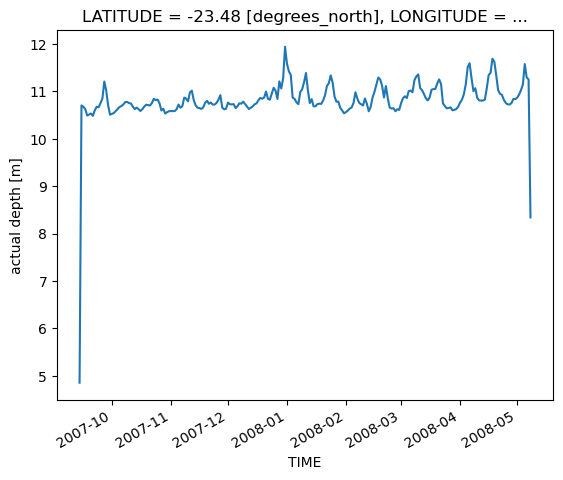

In [20]:
ds_0_daily['DEPTH'].plot()

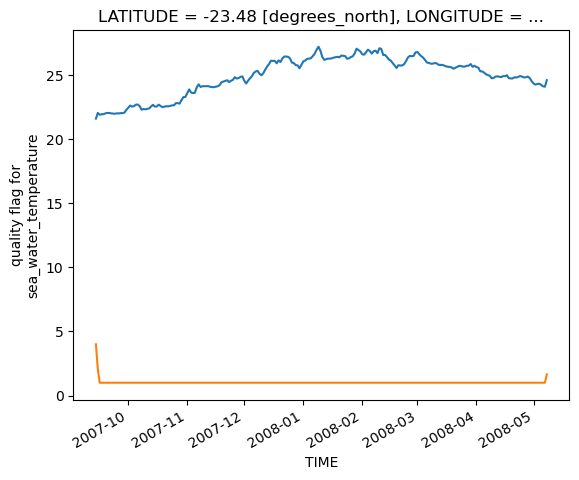

In [18]:
ds_0_daily['TEMP'].plot()
ds_0_daily['TEMP_quality_control'].plot()

In [10]:
ds_ls[0]

<xarray.Dataset>
Dimensions:                (TIME: 68081)
Coordinates:
  * TIME                   (TIME) datetime64[ns] 2007-09-14T20:00:00.00000332...
    LATITUDE               float64 ...
    LONGITUDE              float64 ...
    NOMINAL_DEPTH          float32 ...
Data variables:
    TIMESERIES             int32 ...
    TEMP                   (TIME) float32 ...
    TEMP_quality_control   (TIME) float32 ...
    DEPTH                  (TIME) float32 ...
    DEPTH_quality_control  (TIME) float32 ...
Attributes: (12/56)
    abstract:                      The Queensland and Northern Australia moor...
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Australian Institute of Marine Science
    author_email:                  adc@aims.gov.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    ...                            ...
    time_deployment_end_origin:    TimeLastGoodData
    time_deployment_start:         2007-09-15T08:30:00Z
    time_deployment_start_origin:  TimeFirstGoodData
    title:                         IMOS One Tree East Mooring. Deployed  - 15...
    toolbox_input_file:            /export/imos/Processed/QIMOS/GBROTE/GBROTE...
    toolbox_version:               2.6.10 - GLNXA64

In [110]:
# ds_gbr = xr.open_mfdataset(files, concat_dim='TIME', combine='nested', coords='minimal', compat='override')
ds_gbr = xr.open_mfdataset(files, concat_dim='TIME', combine='nested')
# ds_gbr = xr.open_mfdataset(files)
ds_gbr

<xarray.Dataset>
Dimensions:                   (TIME: 4802706)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2007-09-14T20:00:00.00000...
    LATITUDE                  (TIME) float64 -23.48 -23.48 ... -23.48 -23.48
    LONGITUDE                 (TIME) float64 152.2 152.2 152.2 ... 152.2 152.2
    NOMINAL_DEPTH             (TIME) float32 10.0 10.0 10.0 ... 58.85 58.85
Data variables:
    TIMESERIES                (TIME) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                      (TIME) float32 dask.array<chunksize=(68081,), meta=np.ndarray>
    TEMP_quality_control      (TIME) float32 dask.array<chunksize=(68081,), meta=np.ndarray>
    DEPTH                     (TIME) float32 dask.array<chunksize=(68081,), meta=np.ndarray>
    DEPTH_quality_control     (TIME) float32 dask.array<chunksize=(68081,), meta=np.ndarray>
    PRES_REL                  (TIME) float32 dask.array<chunksize=(253751,), meta=np.ndarray>
    PRES_REL_quality_control  (TIME) float32 dask.array<chunksize=(253751,), meta=np.ndarray>
Attributes: (12/56)
    abstract:                      The Queensland and Northern Australia moor...
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Australian Institute of Marine Science
    author_email:                  adc@aims.gov.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    ...                            ...
    time_deployment_end_origin:    TimeLastGoodData
    time_deployment_start:         2007-09-15T08:30:00Z
    time_deployment_start_origin:  TimeFirstGoodData
    title:                         IMOS One Tree East Mooring. Deployed  - 15...
    toolbox_input_file:            /export/imos/Processed/QIMOS/GBROTE/GBROTE...
    toolbox_version:               2.6.10 - GLNXA64

In [113]:
%%time
ds_gbr_temp_qc = ds_gbr['TEMP_quality_control'].compute()

KeyboardInterrupt: 

In [112]:
ds_gbr['TEMP'].plot()

KeyboardInterrupt: 

In [111]:
ds_gbr.NOMINAL_DEPTH.values

array([10.  , 10.  , 10.  , ..., 58.85, 58.85, 58.85], dtype=float32)

In [97]:
ds_combined = xr.concat(ds_ls, dim=['TIME'])

2023-12-06 14:08:46,876 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:32979'.
2023-12-06 14:08:46,884 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:44999'.
2023-12-06 14:08:46,884 - distributed.worker - ERROR - Scheduler was unaware of this worker 'tcp://127.0.0.1:32979'. Shutting down.
2023-12-06 14:08:46,885 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:35373'.
2023-12-06 14:08:46,885 - distributed.worker - ERROR - Scheduler was unaware of this worker 'tcp://127.0.0.1:44999'. Shutting down.
2023-12-06 14:08:46,887 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:34491'.
2023-12-06 14:08:46,887 - distributed.worker - ERROR - Scheduler was unaware of this worker 'tcp://127.0.0.1:35373'. Shutting down.
2023-12-06 14:08:46,889 - distributed.scheduler - WARNING - Received heartbeat from unre

KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
2023-12-06 14:08:48,979 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/distributed/nanny.py", line 1014, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/g/data/hh5/public/apps/miniconda3/e

In [96]:
sorted_ds_ls = sorted(ds_ls, key=lambda ds: ds['TIME'].values)
sorted_ds_ls

ValueError: operands could not be broadcast together with shapes (49503,) (49554,) 

In [95]:
len(ds_ls)

466

In [92]:
%%time
mooring_data = xr.open_mfdataset(files)

ValueError: Resulting object does not have monotonic global indexes along dimension TIME

In [ ]:
import xarray as xr

# Assuming datasets_list is a list of xarray datasets
# For example, datasets_list = [ds1, ds2, ds3, ...]

# Sort datasets along the 'TIME' dimension
sorted_datasets = sorted(datasets_list, key=lambda ds: ds['TIME'].values)

# Concatenate datasets along the 'TIME' dimension
combined_dataset = xr.concat(sorted_datasets, dim='TIME')


In [1]:
from dask import delayed

In [3]:
import dask

In [18]:
files[:10]

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-130_END-20130606T215200Z_C-20131119T020512Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-180_END-20130606T215200Z_C-20131119T020513Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-250_END-20130606T215200Z_C-20131119T020513Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-350_END-20130606T215200Z_C-20131119T020513Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-40_END-20130606T215200Z_C-20131119T020512Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_2012032

In [27]:
def subset_files(path, keyword):
    files_sub = glob.glob(path + f'*{keyword}*')
    print(len(files_sub))
    print(files_sub[:4])
    return files_sub

In [28]:
files_qld = subset_files(east_coast_mooring_path, 'QLD')

466
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20141023T073000Z_GBROTE_FV01_GBROTE-1410-SBE39-14_END-20150326T064500Z_C-20200522T114448Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_CSTZ_20200621T012901Z_GBROTE_FV01_GBROTE-2006-SBE37SM-RS232-18_END-20201216T010900Z_C-20210128T014334Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20120323T071000Z_GBROTE_FV01_GBROTE-1203-SBE39-20.5_END-20120922T011000Z_C-20200520T064201Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20190326T000000Z_GBROTE_FV01_GBROTE-1903-SBE39-15.8_END-20190709T173000Z_C-20190913T041842Z.nc']


In [29]:
files_nsw = subset_files(east_coast_mooring_path, 'NSW')

5639
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20160225T130000Z_BMP120_FV01_BMP120-1602-Aqualogger-520T-100_END-20160701T030000Z_C-20160901T052423Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20100413T130000Z_SYD140_FV01_SYD140-1004-Aqualogger-520T-72_END-20100620T041500Z_C-20160830T012359Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20220516T224500Z_BMP120_FV01_BMP120-2205-Aqualogger-AQUAlogger-520PT20-max200m-89_END-20220913T202500Z_C-20220916T061708Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20170130T130000Z_SYD140_FV01_SYD140-1702-Aqualogger-520T-112_END-20170503T071000Z_C-20170511T053931Z.nc']


In [30]:
files_nsw_bmp = subset_files(east_coast_mooring_path, 'BMP')


883
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20160225T130000Z_BMP120_FV01_BMP120-1602-Aqualogger-520T-100_END-20160701T030000Z_C-20160901T052423Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20220516T224500Z_BMP120_FV01_BMP120-2205-Aqualogger-AQUAlogger-520PT20-max200m-89_END-20220913T202500Z_C-20220916T061708Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20110325T130000Z_BMP090_FV01_BMP090-1103-Aqualogger-520T-52_END-20110513T042000Z_C-20160901T002124Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20160225T130000Z_BMP070_FV01_BMP070-1602-Aqualogger-AQUAlogger-520PT16-max160m-67_END-20160701T011000Z_C-20160901T045301Z.nc']


In [31]:
files_nsw_syd = subset_files(east_coast_mooring_path, 'SYD')

1874
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20100413T130000Z_SYD140_FV01_SYD140-1004-Aqualogger-520T-72_END-20100620T041500Z_C-20160830T012359Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20170130T130000Z_SYD140_FV01_SYD140-1702-Aqualogger-520T-112_END-20170503T071000Z_C-20170511T053931Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20201012T014500Z_SYD100_FV01_SYD100-2010-Aqualogger-AQUAlogger-520T-max1000m-73_END-20210112T231500Z_C-20210216T042459Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20091028T130000Z_SYD140_FV01_SYD140-0910-Aqualogger-520PT-87_END-20091228T091000Z_C-20160830T002533Z.nc']


In [41]:
remaining_files = list(set(files)- set(files_qld) - set(files_nsw_syd) - set(files_nsw_bmp))
len(remaining_files)

2943

In [44]:
files_nsw_coffs = subset_files(east_coast_mooring_path, 'CH')

1659
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20110606T050000Z_CH070_FV01_CH070-1108-Aqualogger-520PT-29_END-20110906T054000Z_C-20160824T043851Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20160811T130000Z_CH070_FV01_CH070-1608-Aqualogger-520PT-31_END-20161109T012000Z_C-20161114T041433Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20220806T225000Z_CH100_FV01_CH100-220807-Aqualogger-AQUAlogger-520PT16-max160m-8.5_END-20220903T173000Z_C-20230202T010512Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20180807T130000Z_CH100_FV01_CH100-1808-Aqualogger-520T-26_END-20181105T234500Z_C-20181112T045726Z.nc']


In [46]:
files_nsw_OR = subset_files(east_coast_mooring_path, 'OR')

509
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20201203T225000Z_ORS065_FV01_ORS065-2012-Aqualogger-AQUAlogger-520T-max1000m-40_END-20210110T210500Z_C-20230531T063938Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20210811T231500Z_ORS065_FV01_ORS065-2108-Aqualogger-AQUAlogger-520T-max1000m-28_END-20210831T222000Z_C-20230531T053007Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20210308T220500Z_ORS065_FV01_ORS065-2103-Aqualogger-AQUAlogger-520T-max1000m-20_END-20210413T234000Z_C-20230522T033742Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20210831T224000Z_ORS065_FV01_ORS065-2109-Aqualogger-AQUAlogger-520T-max1000m-52_END-20211012T212000Z_C-20230531T045759Z.nc']


In [47]:
files_nsw_jb = subset_files(east_coast_mooring_path, 'JB')

8
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20090728T020000Z_JB070_FV01_JB070-0907-SBE39-12_END-20091104T001000Z_C-20190501T041100Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20090728T020000Z_JB070_FV01_JB070-0907-SBE39-36_END-20091104T001000Z_C-20190501T041059Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20090728T020000Z_JB070_FV01_JB070-0907-SBE39-57_END-20091104T001000Z_C-20190501T041058Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20090728T020000Z_JB070_FV01_JB070-0907-SBE39-52_END-20091104T001000Z_C-20190501T041059Z.nc']


In [42]:
remaining_files[:5]

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20090728T020000Z_JB070_FV01_JB070-0907-SBE39-36_END-20091104T001000Z_C-20190501T041059Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20220425T231000Z_ORS065_FV01_ORS065-2204-Aqualogger-520T-28_END-20220503T222000Z_C-20221020T012717Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20110829T050000Z_CH070_FV01_CH070-1109-Aqualogger-520T-18.8_END-20111115T002500Z_C-20160824T044502Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20110408T010000Z_CH070_FV01_CH070-1104-Aqualogger-520PT-28.5_END-20110808T102500Z_C-20160824T042205Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20111104T130000Z_CH070_FV01_CH070-1111-Aqualogger-520T-62.4_END-20120112T235000Z_C-20160824T054257Z.nc']

In [50]:
remaining_files_2 = list(set(files) - set(files_nsw_OR) - set(files_nsw_coffs) - set(files_nsw_syd) - set(files_nsw_bmp) -
                                                              set(files_nsw_jb) - set(files_qld))
remaining_files_2

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20121126T130000Z_PH100_FV01_PH100-1212-Aqualogger-520T-80_END-20130309T010000Z_C-20160803T060020Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20130602T130000Z_PH100_FV01_PH100-1306-Aqualogger-520PT-16_END-20130901T064500Z_C-20160804T074646Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20190824T130000Z_PH100_FV01_PH100-1908-Aqualogger-AQUAlogger-520T-max1000m-96_END-20191207T220500Z_C-20191218T022208Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20160825T130000Z_PH100_FV01_PH100-1609-Aqualogger-520T-32_END-20161209T002500Z_C-20170117T044034Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20200814T004000Z_SR030_FV01_SR030-2008-Aqualogger-AQUAlogger-520PT20-max200m-25.9_END-20210917T004000Z_C-20230310T015929Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20101228T130000Z_PH100_FV01_PH100-1101-Aqualogger-520T-56_END-20110128T032500Z_C-20160803T023820Z.

In [51]:
files_nsw_ph = subset_files(east_coast_mooring_path, 'PH')

852
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20100503T130000Z_PH100_FV01_PH100-1005-Aqualogger-520T-88_END-20100606T070000Z_C-20160803T013307Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20130826T130000Z_PH100_FV01_PH100-1309-Aqualogger-520T-64_END-20131129T044000Z_C-20160804T084936Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20121126T130000Z_PH100_FV01_PH100-1212-Aqualogger-520PT-16_END-20130309T031500Z_C-20160803T060022Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20130826T130000Z_PH100_FV01_PH100-1309-Aqualogger-520T-32_END-20131105T045000Z_C-20160804T084937Z.nc']


In [53]:
remaining_files_3 = list(set(remaining_files_2) - set(files_nsw_ph))
remaining_files_3

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120325T002056Z_SEQ200-SubSurface_FV01_SEQ200-SubSurface-120325-SBE37SM-RS232-130_END-20130606T202300Z_C-20131119T020207Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20220919T013400Z_NRSNSI-SubSurface_FV01_NRSNSI-SubSurface-34-2022-09-SBE37SMP-RS232-20_END-20230112T001900Z_C-20230131T033402Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-250_END-20130606T215200Z_C-20131119T020513Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20191214T222600Z_NRSNSI-SubSurface_FV01_NRSNSI-SubSurface-27-2019-12-SBE37SM-RS232-60_END-20201027T220000Z_C-20201207T012445Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20210917T023000Z_SR050_FV01_SR050-2109-Aqualogger-AQUAlogger-520PT16-max160m-41.3_END-20221005T005000Z_C-20230310T013802Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20

In [54]:
leftovers = ['SEQ', 'NRSNSI', 'SR', 'PATUN']

leftovers_dict = {}

for keyword in leftovers:
    files_sub = subset_files(east_coast_mooring_path, f'{keyword}')
    leftovers_dict[f'{keyword}'] = files_sub
    

16
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-350_END-20130606T215200Z_C-20131119T020513Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120325T002056Z_SEQ200-SubSurface_FV01_SEQ200-SubSurface-120325-SBE37SM-RS232-40_END-20130606T202300Z_C-20131119T020206Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-40_END-20130606T215200Z_C-20131119T020512Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-SBE37SM-RS232-80_END-20130606T215200Z_C-20131119T020512Z.nc']
22
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_20230506T001600Z_NRSNSI-SubSurface_FV01_NRSNSI-SubSurface-36-2023-04-SBE37SM-RS232-20_END-20230918T001600Z_C-20231023T030911Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NRS_CSTZ_2021

In [58]:
leftovers_ls = []
for key, list in leftovers_dict.items():
    leftovers_ls.extend(list)
len(leftovers_ls)

67

In [65]:
sites = ['GBR', 'CH', 'SYD', 'JB', 'OR', 'PH', 'BMP', 'SEQ', 'NRSNSI', 'SR', 'PATUN']

remaining_files = files
# create dictionary with all the sites
site_dict = {}
for site in sites:
    files_sub = subset_files(east_coast_mooring_path, site)
    site_dict[f'{site}'] = files_sub
    # remaining_files = list(set(remaining_files) - set(files_sub))
    print(f'{site} had {len(files_sub)} files')


466
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20141023T073000Z_GBROTE_FV01_GBROTE-1410-SBE39-14_END-20150326T064500Z_C-20200522T114448Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_CSTZ_20200621T012901Z_GBROTE_FV01_GBROTE-2006-SBE37SM-RS232-18_END-20201216T010900Z_C-20210128T014334Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20120323T071000Z_GBROTE_FV01_GBROTE-1203-SBE39-20.5_END-20120922T011000Z_C-20200520T064201Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-QLD_TZ_20190326T000000Z_GBROTE_FV01_GBROTE-1903-SBE39-15.8_END-20190709T173000Z_C-20190913T041842Z.nc']
GBR had 466 files
1659
['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20110606T050000Z_CH070_FV01_CH070-1108-Aqualogger-520PT-29_END-20110906T054000Z_C-20160824T043851Z.nc', '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_TZ_20160811T130000Z_CH070_FV01_CH070-1608-Aqualogger-520PT-31_END-20161109T012000Z_C-20161114T041433Z.nc', '/scratch/v45/jr5971/imos-mooring

So, we've got this massive list of netcdf files that belong to different sites. 

It'd be cool to summarise all this data in a pandas dataframe like how we did with the times. 

In [83]:
sr = xr.open_dataset(site_dict['SR'], engine='netcdf4')

ValueError: can only read bytes or file-like objects with engine='scipy' or 'h5netcdf'

In [80]:
syd_ls = sorted(site_dict['SYD'])
syd_ls.sort()
syd_sorted = syd_ls.copy()
syd_sorted

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210429T015500Z_SYD140_FV01_SYD140-2104-SBE37SM-RS232-128_END-20210812T011500Z_C-20210827T074819Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210429T015500Z_SYD140_FV01_SYD140-2104-SBE37SM-RS232-24_END-20210812T011500Z_C-20210827T074823Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210812T015000Z_SYD140_FV01_SYD140-2108-SBE37SMP-RS232-128_END-20211109T231500Z_C-20211214T010709Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210812T015000Z_SYD140_FV01_SYD140-2108-SBE37SMP-RS232-24_END-20211109T231500Z_C-20211214T010713Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20211110T000000Z_SYD140_FV01_SYD140-2111-SBE37SMP-RS232-24_END-20220209T234500Z_C-20220302T061127Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20220111T002500Z_SYD100_FV01_SYD100-2201-SBE37SMP-RS232-17_END-20220426T000000Z_C-20220606T064150Z.nc',
 '/scratch/v45/j

In [71]:
site_dict['SYD']

['/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210429T015500Z_SYD140_FV01_SYD140-2104-SBE37SM-RS232-128_END-20210812T011500Z_C-20210827T074819Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210429T015500Z_SYD140_FV01_SYD140-2104-SBE37SM-RS232-24_END-20210812T011500Z_C-20210827T074823Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210812T015000Z_SYD140_FV01_SYD140-2108-SBE37SMP-RS232-128_END-20211109T231500Z_C-20211214T010709Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20210812T015000Z_SYD140_FV01_SYD140-2108-SBE37SMP-RS232-24_END-20211109T231500Z_C-20211214T010713Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20211110T000000Z_SYD140_FV01_SYD140-2111-SBE37SMP-RS232-24_END-20220209T234500Z_C-20220302T061127Z.nc',
 '/scratch/v45/jr5971/imos-mooring-data/IMOS_ANMN-NSW_CDSTZ_20220111T002500Z_SYD100_FV01_SYD100-2201-SBE37SMP-RS232-17_END-20220426T000000Z_C-20220606T064150Z.nc',
 '/scratch/v45/j

In [68]:
syd_files = site_dict['SYD'].sort()
syd_files[:20]
# da_syd = xr.open_mfdataset(site_dict['SYD'].sort())
# da_syd

TypeError: 'NoneType' object is not subscriptable

In [60]:
remaining_files_4 = list(set(remaining_files_3) - set(leftovers_ls))
remaining_files_4

TypeError: 'list' object is not callable

In [11]:
@dask.delayed

def open_ds(filepath):
    return xr.open_dataset(filepath)

ds_ls = []
for file in files:
    try:
        ds = delayed(open_ds)(file)
        ds_ls.append(ds)
    except:
        badfiles.append(file)


In [12]:
test = dask.compute(*ds_ls)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/coding/times.py:237: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/coding/times.py:237: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axi

In [14]:
len(test)

6166

In [17]:
ds_imosMoorings = xr.concat(test, dim='TIME')

ValueError: {'DEPTH'} is a coordinate in some datasets but not others.

In [16]:
test[0].nbytes/1e9

0.016213884

In [9]:
# Select u,v and subset to same domain as 'eac_eddy' 
eddy_idx = {'W':-210, 'E':-204, 'S':-40, 'N':-24}

**Open the velocity components from access**

In [10]:
u = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/u_om2_z30_eac.nc')
v = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/v_om2_z30_eac.nc')
u

<xarray.DataArray 'u' (time: 10957, yu_ocean: 190, xu_ocean: 60)>
[124909800 values with dtype=float32]
Coordinates:
  * xu_ocean  (xu_ocean) float64 -210.0 -209.9 -209.8 ... -204.3 -204.2 -204.1
  * yu_ocean  (yu_ocean) float64 -39.99 -39.91 -39.84 ... -24.24 -24.15 -24.06
    st_ocean  float64 ...
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_x_velocity

### Vorticity Calculation

In [11]:
# Parameters used for computing quantities
Omega = 7.292e-5 # Earth's rotation rate in radian/s
Rearth = 6371.e3 # Earth's radius in m

In [12]:
lon = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/output000/ocean/ocean-2d-geolon_c.nc')['geolon_c']
lat = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/output000/ocean/ocean-2d-geolat_c.nc')['geolat_c']
lon

<xarray.DataArray 'geolon_c' (yu_ocean: 2700, xu_ocean: 3600)>
[9720000 values with dtype=float32]
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
    geolon_c  (yu_ocean, xu_ocean) float32 ...
Attributes:
    long_name:     uv longitude
    units:         degrees_E
    valid_range:   [-281.  361.]
    cell_methods:  time: point

In [13]:
# Calculate the Coriolis parameter f = 2*Omega*sin(lat)
f = 2 * Omega * np.sin(np.deg2rad(lat))
f.attrs['long_name'] = 'Coriolis Parameter'
f.attrs['units'] = 's-1'
f.attrs['coordinates'] = 'geolon_c geolat_c'

In [14]:
## Get grid information from old experiment
folder = '/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf_gmredi6/output000/ocean/'
grid_old = xr.open_mfdataset(folder+'ocean_grid.nc', combine='by_coords')
grid_old.data_vars

Data variables:
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    hu          (yu_ocean, xu_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    dxu         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    dyu         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    area_u      (yu_ocean, xu_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    kmt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    kmu         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    drag_coeff  (time, yu_ocean, x

In [15]:
# Get the grid variables from the most recent OM2 experiment
## create list of variable names from older grid
grid_vars=list(grid_old.data_vars)
## Create empty list to store variable pathnames
grid_file_ls = []
## Loop through grid-variable names, find path, and append to empty list
for var in grid_vars:
    pattern = f'{access}/output150/ocean/*{var}*.nc'
    matches = glob.glob(pattern)
    grid_file_ls.extend(matches)
# Open an xr.Dataset with all grid variables
grid = xr.open_mfdataset(grid_file_ls)
# Cut down to eddy box
grid = grid.sel(xt_ocean=slice(eddy_idx['W'], eddy_idx['E']), 
                xu_ocean=slice(eddy_idx['W'], eddy_idx['E']),
                yt_ocean=slice(eddy_idx['S'], eddy_idx['N']),
                yu_ocean=slice(eddy_idx['S'], eddy_idx['N']))

grid

<xarray.Dataset>
Dimensions:     (xt_ocean: 60, yt_ocean: 190, time: 2, xu_ocean: 60,
                 yu_ocean: 190)
Coordinates:
  * xt_ocean    (xt_ocean) float64 -209.9 -209.8 -209.7 ... -204.2 -204.1 -204.0
  * yt_ocean    (yt_ocean) float64 -39.95 -39.88 -39.8 ... -24.2 -24.11 -24.01
  * time        (time) datetime64[ns] 1900-01-01 1995-10-01
  * xu_ocean    (xu_ocean) float64 -210.0 -209.9 -209.8 ... -204.3 -204.2 -204.1
  * yu_ocean    (yu_ocean) float64 -39.99 -39.91 -39.84 ... -24.24 -24.15 -24.06
Data variables:
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(190, 20), meta=np.ndarray>
    area_u      (yu_ocean, xu_ocean) float32 dask.array<chunksize=(190, 21), meta=np.ndarray>
    drag_coeff  (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(2, 190, 21), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(190, 20), meta=np.ndarray>
    dxu         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(190, 21), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(190, 20), meta=np.ndarray>
    dyu         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(190, 21), meta=np.ndarray>
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(190, 20), meta=np.ndarray>
    hu          (yu_ocean, xu_ocean) float32 dask.array<chunksize=(190, 21), meta=np.ndarray>
    kmt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(190, 20), meta=np.ndarray>
    kmu         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(190, 21), meta=np.ndarray>
Attributes:
    filename:   ocean-2d-area_t.nc
    title:      ACCESS-OM2-01
    grid_type:  mosaic
    grid_tile:  1
    history:    20221028T0304Z: /g/data/ik11/inputs/access-om2/bin/mppnccombi...

In [16]:
# Create new dataset that has both velocity components and grid information
ds = xr.merge([u, v, grid])
# Update coordinate attributes
ds.coords['xt_ocean'].attrs.update(axis='X')
# Shift the corner (u) point 0.5 to the right of t-cell axis
ds.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yt_ocean'].attrs.update(axis='Y')
ds.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = Grid(ds, periodic=False)

In [17]:
%%time
zeta_xgcm = ( grid.interp( grid.diff(ds.v, 'X') / grid.interp(ds.dxu, 'X'), 'Y', boundary='extend')
             - grid.interp( grid.diff(ds.u, 'Y', boundary='extend') / grid.interp(ds.dyt, 'X'), 'X') )

CPU times: user 1.03 s, sys: 559 ms, total: 1.59 s
Wall time: 1.26 s


In [18]:
%%time
zeta_xgcm = zeta_xgcm.compute()

CPU times: user 6.49 s, sys: 4.56 s, total: 11 s
Wall time: 24.9 s


### Plotting

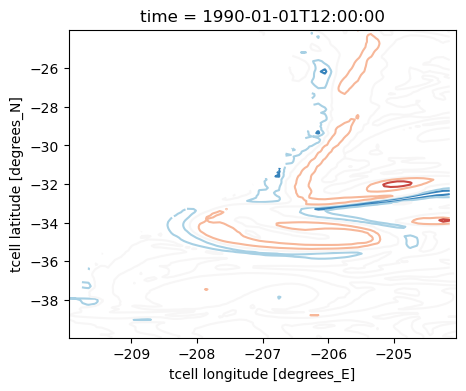

In [37]:
plt.figure(figsize=(5,4))
zeta_xgcm.isel(time=1).plot.contour()

Okay so my idea about relative vorticity contours didn't really work. Should we look to SSH now? 

Okay, so this is pretty cool what I'm seeing above. The relative vorticity adds some value in terms of understanding the rotational shear in the current. 

In [19]:
zeta = zeta_xgcm[1:,:,:]

In [ ]:
maxvalue = 8e-5

def plot_zeta_contours(i):
    fig, ax = plt.subplots(figsize=(4,4), subplot_kw={'projection':ccrs.PlateCarree()})
    zeta.isel(time=i).plot.contour(ax=ax, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.coastlines()
    ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

In [ ]:
interact(plot_zeta_contours, i=(0, len(zeta.time),1))

interactive(children=(IntSlider(value=5479, description='i', max=10958), Output()), _dom_classes=('widget-inte…

<function __main__.plot_zeta_contours(i)>

In [ ]:
def plot_eac_eke(i):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=170)})
    
    # ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=170))
    EKE_om2.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=0, vmax=0.6)
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')
    zeta.isel(time=i).plot.contour(ax=ax2, transform=ccrs.PlateCarree(), vmin=-maxvalue, vmax=maxvalue, cmap=cm.cm.balance)
    ax2.add_feature(cfeature.LAND)
    ax2.coastlines()
    ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

In [10]:
# interact(plot_eac_eke, i=(0, len(EKE_om2.time),1))

What I'd like to do now is - have a third plot of temperature shading and streamlines for the velocity...

### Temperature and velocity streamlines

In [20]:
%%time
om2_temp = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/temp_om2_z30.nc')

CPU times: user 37.7 ms, sys: 9.14 ms, total: 46.9 ms
Wall time: 69.9 ms


#### Prepare data for streamplot
Here, it should be a lot easier to prepare the velocity data for ACCESS on the B-Grid compared to MOM6 on the C-grid. 

In [21]:
# define resolution of new target grid
res = 1 # 2 equals half the resolution of native grid
# Rename coords to lon/lat
u = u.rename({'xu_ocean':'lon', 'yu_ocean':'lat'})
v = v.rename({'xu_ocean':'lon', 'yu_ocean':'lat'})

# Create target grid with equal spaced points
x_target = np.linspace(u['lon'].min(), u['lon'].max(), int(len(u['lon']) / res))
y_target = np.linspace(u['lat'].min(), u['lat'].max(), int(len(u['lat']) / res))
X_target, Y_target = np.meshgrid(x_target, y_target)

# Create regridder object
regridder = xesmf.Regridder(u, {'lon':X_target, 'lat':Y_target}, 'bilinear')

# regrid data
u_target = regridder(u)
v_target = regridder(v)

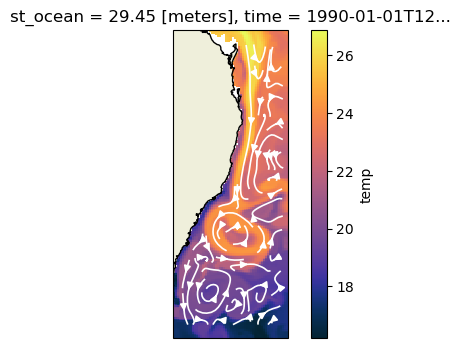

In [22]:
# Plot temperature and streamlines
fig, ax = plt.subplots(figsize=(6,4), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=170)})
om2_temp.isel(time=0).plot(ax=ax, cmap=cm.cm.thermal, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.streamplot(x_target, y_target, u_target.isel(time=0).data, v_target.isel(time=0).data, density=.8, color='w', transform=ccrs.PlateCarree(), 
              linewidth=1.2)#, broken_streamlines=False)
ax.coastlines()

In [23]:
def plot_eac_temp(i):
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=170)})
    om2_temp.isel(time=i).plot(ax=ax, cmap=cm.cm.thermal, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    # Plot velocities as streamplot
    ax.streamplot(x_target, y_target, u_target.isel(time=i), v_target.isel(time=i), density=0.6, color='w', transform=ccrs.PlateCarree(),
                    linewidth=1.5, broken_streamlines=False, arrowsize=1, arrowstyle='fancy')
    ax.coastlines()
    ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

In [24]:
interact(plot_eac_temp, i=(0, len(om2_temp.time),1))

interactive(children=(IntSlider(value=5478, description='i', max=10957), Output()), _dom_classes=('widget-inte…

<function __main__.plot_eac_temp(i)>

Could we possibly add some MHW information to the above plot?

Plot when given cells are under MHW conditions? For that, we'd need to run a MHW analysis over a depth of say 30m (Below the Ekman Layer).

That could be quite cool actually.

**After discussion with Chris:**
So there's two different focal points here - (1) The dynamical systems work around eddy shedding, and (2) the MHW work around coastal temperature extremes. They most certainly overlap however the future analysis that's needed for these two directions is quite different. 

* For the eddy shedding - I'm interested in whether there's any periodicity in the anticylonic eddy variability in the EAC extension. For that - as Chris mentioned, the EKE might not be the most suitable metric as it removes the polarity of the eddies, whereas perhaps taking the positive potential vorticity might be more suitable? 

In [25]:
# separation box
sep_idx = {'W':-208.5, 'E':-206.5, 'S':-36.5, 'N': -34}
zeta_sep = zeta.sel(xt_ocean=slice(sep_idx['W'], sep_idx['E']), yt_ocean=slice(sep_idx['S'], sep_idx['N'])).mean(['xt_ocean','yt_ocean'])

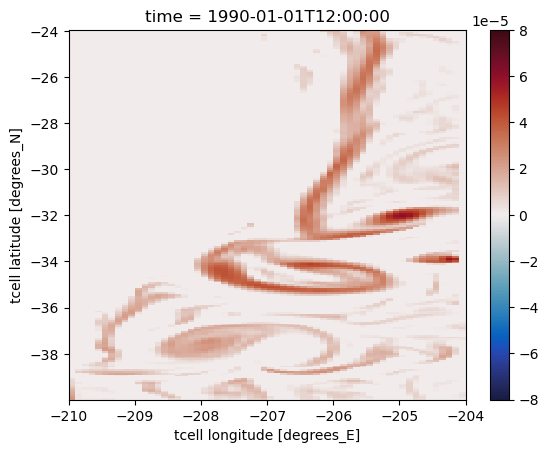

In [ ]:
maxvalue = 8e-5
zeta_pos = zeta.where(zeta > 0, 0)
zeta_pos.isel(time=0).plot(cmap=cm.cm.balance, vmin=-maxvalue, vmax=maxvalue)

In [ ]:
da = zeta_pos
ts = zeta_pos.sel(xt_ocean=slice(sep_idx['W'], sep_idx['E']), yt_ocean=slice(sep_idx['S'], sep_idx['N'])).mean(['xt_ocean','yt_ocean'])
def plot_zeta_box(i):
    fig = plt.figure(figsize=(10,4))
    gs = fig.add_gridspec(2,5)
    ax1 = fig.add_subplot(gs[:,0], projection=ccrs.PlateCarree())
    da.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=cm.cm.balance, vmin=-maxvalue, vmax=maxvalue)
    sep_box = patches.Rectangle((sep_idx['W'], sep_idx['S']), (sep_idx['E']-sep_idx['W']), (sep_idx['N']-sep_idx['S']),
                                fill=None, color='r', transform=ccrs.PlateCarree())
    ax1.add_patch(sep_box)
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')
   
    xmin = np.max([0, i-500])
    xmax = np.min([i+500, len(zeta.time)])
    ax2 = fig.add_subplot(gs[:,2:])
    ax2.plot(ts)
    ax2.scatter(peak_indices, ts[peak_indices], color='orange', label='Peaks')
    
    ax2.set_xlim(xmin, xmax)
    ax2.scatter(i, ts[i], color='r', zorder=3)
    ax2.set_xlabel('Days since 1990-01-01')

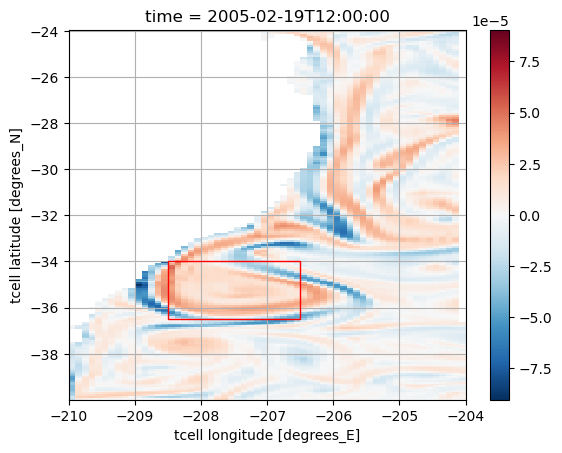

In [ ]:
fig, ax = plt.subplots()
zeta.isel(time=5529).plot(ax=ax)
sep_box = patches.Rectangle((sep_idx['W'], sep_idx['S']), (sep_idx['E']-sep_idx['W']), (sep_idx['N']-sep_idx['S']),
                            fill=None, color='r', zorder=3)#, transform=ccrs.PlateCarree())
ax.add_patch(sep_box)
ax.grid()

In [ ]:
interact(plot_zeta_box, i=(0, len(zeta.time),1))

**Find the peaks in the relative vorticity**

In [ ]:
from scipy.signal import find_peaks

In [ ]:
peak_indices, _ = find_peaks(ts, height=0.8E-05, distance=80)
peak_indices

NameError: name 'ts' is not defined

In [ ]:
# Plot the time series and mark the peaks
def scroll_peaks(i):
    plt.plot(ts, label=f'$\zeta$')
    plt.scatter(peak_indices, ts[peak_indices], color='r', label='Peaks')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.title(f'$\zeta$ with peaks of positive vorticity')
    xmin = np.max([0, i-500])
    xmax = np.min([i+500, len(ts.time)])
    plt.xlim(xmin, xmax)


In [ ]:
interact(scroll_peaks, i=(0, len(ts.time), 1))

In [ ]:
# Find the difference between the peaks...
peak_diff = np.diff(peak_indices)
peak_diff.mean()

In [1]:
import seaborn as sns

In [31]:
sns.distplot(peak_diff, hist=True, kde=True,
             bins=20,
             color='orange',
             hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2, 'bw':0.5, 'shade':True})
plt.title('Days between Peaks of Warm-core rings in EAC Extension')
plt.xlabel('Time (Days)')
plt.ylabel('Density')


NameError: name 'peak_diff' is not defined

#### Animate vorticity box and peaks

In [26]:
import matplotlib.animation as animation

Note - it turns out that the saving of the mp4/gif didn't like the ax1.gridlines(...) 

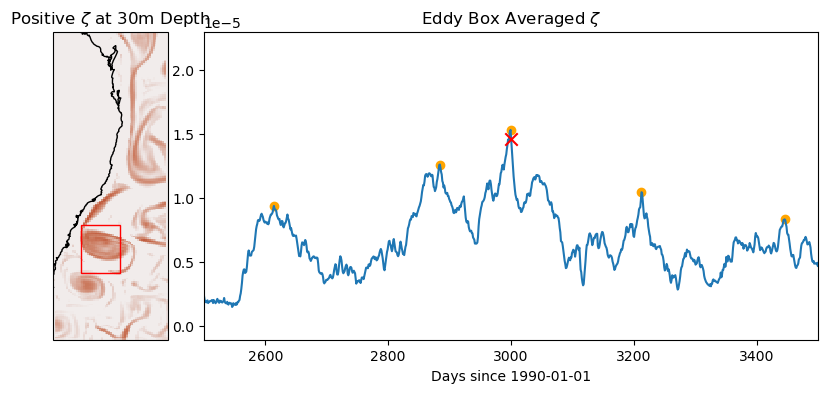

In [65]:
fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(2,5)
ax1 = fig.add_subplot(gs[:,0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[:,1:])
sep_box = patches.Rectangle((sep_idx['W'], sep_idx['S']), (sep_idx['E']-sep_idx['W']), (sep_idx['N']-sep_idx['S']),
                            fill=None, color='r', transform=ccrs.PlateCarree())
def update_plot(i):
    global gs, ax1, ax2, sep_box
    start = 3000
    i = start + i
    ax1.clear()
    ax2.clear()

    # ax1.pcolormesh(da_sub.isel(time=i), transform=ccrs.PlateCarree())
    zeta_pos.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=cm.cm.balance, vmin=-maxvalue, vmax=maxvalue, add_colorbar=False)
    ax1.add_patch(sep_box)
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    ax1.set_title('Positive $\zeta$ at 30m Depth')
    # ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

    xmin = np.max([0, i-500])
    xmax = np.min([i+500, len(ts.time)])
    # ax2 = fig.add_subplot(gs[:,2:])
    ax2.plot(ts)
    ax2.scatter(peak_indices, ts[peak_indices], color='orange', label='Peaks')
    
    ax2.set_xlim(xmin, xmax)
    ax2.scatter(i, ts[i], marker='x', color='r', s=80, zorder=3)
    ax2.set_xlabel('Days since 1990-01-01')
    ax2.set_title('Eddy Box Averaged $\zeta$')

ani = animation.FuncAnimation(fig, update_plot, frames=3000, interval=100, blit=False)

In [27]:
# Increase the memory limit for the animation
import matplotlib as mpl
from IPython.display import HTML
mpl.rcParams['animation.embed_limit'] = 100.0 # MiB

In [29]:
HTML(ani.to_jshtml())

NameError: name 'ani' is not defined

**Saving the animations**

In [67]:
%%time
ani.save('/g/data/v45/jr5971/notebooks/figures/eddy-shedding_3000_new.mp4', writer='ffmpeg', fps=50)

CPU times: user 19min 52s, sys: 2min 42s, total: 22min 35s
Wall time: 19min 32s


In [ ]:
%%time
ani.save('/g/data/v45/jr5971/notebooks/figures/eddy-shedding_3000.gif', writer='imagemagick', fps=50)

In [ ]:
%%time
writergif = animation.PillowWriter(fps=30) 
ani.save('/g/data/v45/jr5971/notebooks/figures/test_animate.gif', writer=writergif)

### Sea level variability
Here I'm looking at the sea surface height (or `eta_t`) in the OM2 output, to see whether we can more robustly show the periodicity in the eddy shedding using Chris/Felipe's approach of the contour tracking. 

In [28]:
# Load eta 
eta_om2 = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/eta_om2.nc')
eta_om2

<xarray.DataArray 'eta_t' (time: 10957, yt_ocean: 190, xt_ocean: 60)>
[124909800 values with dtype=float32]
Coordinates:
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -204.2 -204.1 -204.0
  * yt_ocean  (yt_ocean) float64 -39.95 -39.88 -39.8 ... -24.2 -24.11 -24.01
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      surface height on T cells [Boussinesq (volume conserving)...
    units:          meter
    valid_range:    [-1000.  1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [29]:
def plot_eta_contours(i):
    fig, ax = plt.subplots(figsize=(4,4), subplot_kw={'projection':ccrs.PlateCarree()})
    eta_om2.isel(time=i).plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.375, .5, 0.625], add_colorbar=True)
    ax.add_feature(cfeature.LAND)
    ax.coastlines()
    ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

In [30]:
interactive(plot_eta_contours, i=(0, len(eta_om2.time),1))

interactive(children=(IntSlider(value=5478, description='i', max=10957), Output()), _dom_classes=('widget-inte…

Note - index 132 to 133 for contour 0.5

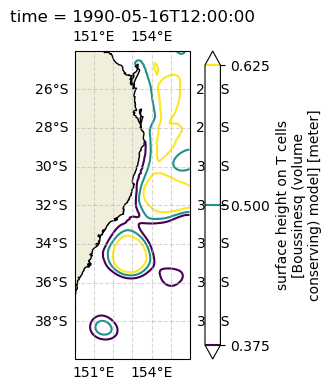

: 

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), subplot_kw={'projection':ccrs.PlateCarree()})
# cplot = eta_om2.isel(time=332).sel(yt_ocean=slice(-38, -34)).plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.375, .5, 0.625], add_colorbar=True)
cplot = eta_om2.isel(time=135).plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.375, .5, 0.625], add_colorbar=True)
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

Okay so the above clearly has two separations. There's surely a very easy way to just split these?

In [31]:
def slice_array(x, y, slices):
    sliced_arrays = [[x[s], y[s]] for s in slices]
    return sliced_arrays

def make_slices(slice_indexes):
    n_slices = len(slice_indexes)
    slices = []
    for i in range(n_slices-1):
        seg_slice = slice(slice_indexes[i], slice_indexes[i+1])
        slices.append(seg_slice)
    return slices

def slice_indices(x, y): 
    dx = abs(np.diff(x))
    dy = abs(np.diff(y))
    diff = np.column_stack((dx,dy))
    slice_idx = np.unique(np.where(diff>1)[0])+1
    slice_idx = np.insert(slice_idx, 0, 0)
    slice_idx = np.concatenate((slice_idx, [len(x)+1]))
    return slice_idx


In [32]:
def plot_eta_contours(i):
    fig = plt.figure(figsize=(8,4))
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[:,0], projection=ccrs.PlateCarree())
    cplot = eta_om2.isel(time=i).plot.contour(ax=ax1, transform=ccrs.PlateCarree(), levels=[0.425, .5, 0.575], colors=['r','k','b'], add_colorbar=True)
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

    ax2 = fig.add_subplot(gs[:,1], projection=ccrs.PlateCarree())
    segx = cplot.allsegs[1][:,0]
    segy = cplot.allsegs[1][:,1]
    slice_idx = slice_indices(segx, segy)
    slices = make_slices(slice_idx)    
    sliced_array = slice_array(segx, segy, slices)
    length = []
    for seg in sliced_array:
        # check if contour is closed and if so, exclude
        if seg[0][0] != seg[0][-1] and seg[1][0] != seg[1][-1]:
            length.append(len(seg[0]))
        else:
            pass

    longest_idx = np.argmax(length)


    for p in range(len(sliced_array)):
        if p == longest_idx:
            c = 'gold'; alpha=1.0
            label='longest'
        else: 
            c = 'b'; alpha=0.5
            label=None
        ax2.plot(sliced_array[p][0], sliced_array[p][1], color=c, alpha=alpha, transform=ccrs.PlateCarree(), label=label)
    # ax2.plot(longest[0], longest[1], color='b', label='Longest', transform=ccrs.PlateCarree())

    ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')
    ax2.set_title(slice_idx)
    ax2.set_ylim(eta_om2.yt_ocean.min(), eta_om2.yt_ocean.max());
    ax2.set_xlim(eta_om2.xt_ocean.min()+360, eta_om2.xt_ocean.max()+360);
    ax2.legend()


In [33]:
interactive(plot_eta_contours, i=(0, len(eta_om2.time),1))

interactive(children=(IntSlider(value=5478, description='i', max=10957), Output()), _dom_classes=('widget-inte…

Great, now that we can select the longest contour, let's now look at making a time-series of the length for this contour. 

For this, we need to run the test over the entire time series, storing the length of the longest contour...

In order to compute this - I've chosen to replace the matplotlib approach with an alternative contour process using the `skimage` package. This finds the contours much more efficiently, and then we can use a `dask.delayed` approach to parallelise and compute the contours over the entire 30 year period. 

In [14]:
from skimage import measure
from dask import delayed
import dask

In [15]:
%%time
@dask.delayed

def get_contours(da):
    return measure.find_contours(da.data, 0.5)

contour_set = []
for i, date in enumerate(eta_om2.time.values):
    contours = delayed(get_contours)(eta_om2.isel(time=i))
    contour_set.append(contours)

CPU times: user 7.05 s, sys: 433 ms, total: 7.49 s
Wall time: 7.35 s


In [16]:
%%time
cs_computed = dask.compute(*contour_set)

2023-12-05 16:11:28,826 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


CPU times: user 2min 46s, sys: 15.8 s, total: 3min 2s
Wall time: 30min 40s


Okay so this is a huge development - I've now worked out how to use dask.delayed to parallelise a for loop which has in turn, decreased the time it takes to run by at least an order of magnitude (hours to minutes).

Now for each timestep, find the longest contour, and save its length. 

In [ ]:
cs_computed

In [ ]:
%%time 
contour_length = []

for i in range(len(eta_om2.time)):
# for i in range(10):

    cplot = eta_om2.isel(time=i).plot.contour(levels=[0.375, 0.5])
    segx = cplot.allsegs[0][:,0]
    segy = cplot.allsegs[0][:,1]
    slice_idx = slice_indices(segx, segy)
    slices = make_slices(slice_idx)    
    sliced_array = slice_array(segx, segy, slices)
    length = []
    for seg in sliced_array:
        length.append(len(seg[0]))
    longest_idx = np.argmax(length)
    contour_length.append(length[longest_idx])
    del cplot
    

In [79]:
%%time
contour_length = []
for i, cs in enumerate(test): 
    length = []
    for seg in cs:
        length.append(len(seg[:,0]))
    longest_idx = np.argmax(length)
    contour_length.append(length[longest_idx])

CPU times: user 23.2 ms, sys: 0 ns, total: 23.2 ms
Wall time: 18 ms


In [17]:
arr_contour = np.array(contour_length)
plt.plot(arr_contour)

NameError: name 'contour_length' is not defined

2023-12-05 17:51:07,621 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,644 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,648 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,652 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,703 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,706 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,710 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:07,715 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:08,009 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:08,015 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:08,019 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:08,026 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:09,013 - distributed.nanny - WARNING - Restarting worker
2023-12-05 17:51:09,017 - distributed.

In [30]:
plt.ioff()
plt.plot(range(10), contour_length)
# plt.show()

Okay, so we need to rewrite the function so that lines are considered separate, not only if dx is big, but dy has to be big as well. 

At the moment, if there are two lines that meet a boundary e.g., the 

Note - index 132 to 133 for contour 0.5

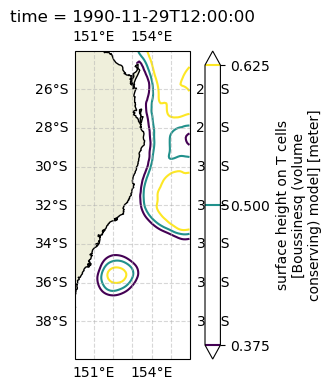

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), subplot_kw={'projection':ccrs.PlateCarree()})
# cplot = eta_om2.isel(time=332).sel(yt_ocean=slice(-38, -34)).plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.375, .5, 0.625], add_colorbar=True)
cplot = eta_om2.isel(time=332).plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.375, .5, 0.625], add_colorbar=True)
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

### MHW DATA
Here, I'm loading in the MHW results from the eddy box as analysed above. I plan to firstly look at things such as animations of temp anomalies, and then look at MHW events afterwards. 

Note also that this MHW analysis was done on the same depth level as above (z30)

In [71]:
# Open threshold results...
th_list = glob.glob('/g/data/v45/jr5971/mhw-analysis/mhws_om2_eac/temp_res/th_res*.nc')
th_list.sort()
clim = xr.open_mfdataset(th_list, concat_dim='lat', combine='nested').sortby('lat')
clim

<xarray.Dataset>
Dimensions:   (doy: 366, lon: 60, lat: 190)
Coordinates:
  * doy       (doy) int64 1 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365 366
  * lon       (lon) float64 -209.9 -209.8 -209.7 -209.6 ... -204.2 -204.1 -204.0
  * lat       (lat) float64 -39.95 -39.88 -39.8 -39.72 ... -24.2 -24.11 -24.01
    quantile  float64 0.9
Data variables:
    thresh    (doy, lat, lon) float64 dask.array<chunksize=(366, 2, 60), meta=np.ndarray>
    seas      (doy, lat, lon) float64 dask.array<chunksize=(366, 2, 60), meta=np.ndarray>
Attributes:
    source:           xmhw code: https://github.com/coecms/xmhw
    title:            Seasonal climatology and threshold calculated to detect...
    history:          2023-11-27: calculated using xmhw code https://github.c...
    xmhw_parameters:  Threshold calculated using:\n    90 percentile;\n    cl...

In [72]:
mhw_ls = glob.glob('/g/data/v45/jr5971/mhw-analysis/mhws_om2_eac/temp_res/det_res*.nc')
mhw_ls.sort()
mhws = xr.open_mfdataset(mhw_ls, concat_dim='lat', combine='nested').sortby('lat')
mhws

<xarray.Dataset>
Dimensions:                         (events: 10512, lon: 60, lat: 190)
Coordinates:
  * events                          (events) float64 1.0 2.0 ... 1.095e+04
  * lon                             (lon) float64 -209.9 -209.8 ... -204.0
  * lat                             (lat) float64 -39.95 -39.88 ... -24.01
Data variables: (12/31)
    event                           (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    index_start                     (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    index_end                       (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    time_start                      (events, lat, lon) datetime64[ns] dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    time_end                        (events, lat, lon) datetime64[ns] dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    time_peak                       (events, lat, lon) datetime64[ns] dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    ...                              ...
    intensity_var_relThresh         (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    intensity_var_abs               (events, lat, lon) float32 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    category                        (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    duration                        (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    rate_onset                      (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
    rate_decline                    (events, lat, lon) float64 dask.array<chunksize=(10512, 2, 60), meta=np.ndarray>
Attributes:
    source:           xmhw code: https://github.com/coecms/xmhw
    title:            Marine heatwave events identified applying the Hobday e...
    history:          2023-11-27: calculated using xmhw code https://github.c...
    xmhw_parameters:  MHW detected using: 5 days of minimum duration;\n      ...

In [34]:
interm_ls = glob.glob('/g/data/v45/jr5971/mhw-analysis/mhws_om2_eac/temp_res/int_res*.nc')
interm_ls.sort()
interm_results = xr.open_mfdataset(interm_ls, concat_dim='lat', combine='nested').sortby('lat')
interm_results

<xarray.Dataset>
Dimensions:            (time: 10957, lon: 60, lat: 190)
Coordinates:
  * time               (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-...
  * lon                (lon) float64 -209.9 -209.8 -209.7 ... -204.1 -204.0
  * lat                (lat) float64 -39.95 -39.88 -39.8 ... -24.2 -24.11 -24.01
Data variables: (12/15)
    ts                 (time, lat, lon) float32 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    seas               (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    thresh             (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    bthresh            (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    events             (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    relSeas            (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    ...                 ...
    cats               (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    duration_moderate  (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    duration_strong    (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    duration_severe    (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    duration_extreme   (time, lat, lon) float64 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>
    mabs               (time, lat, lon) float32 dask.array<chunksize=(10957, 2, 60), meta=np.ndarray>

In [35]:
%%time
# get mhw anomaly (temp anomalies under mhw conditions)
mhw_z30 = interm_results['ts'] - interm_results['seas']
mhw_z30 = mhw_z30.compute()
mhw_z30

CPU times: user 2.64 s, sys: 1.59 s, total: 4.23 s
Wall time: 4.81 s


<xarray.DataArray (time: 10957, lat: 190, lon: 60)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
  * lon      (lon) float64 -209.9 -209.8 -209.7 -209.6 ... -204.2 -204.1 -204.0
  * lat      (lat) float64 -39.95 -39.88 -39.8 -39.72 ... -24.2 -24.11 -24.01

Let's now plot these MHW anomalies next to the EKE and vorticity

In [36]:
maxvalue = 8e-5
def plot_eac_2plot(i):
    fig, (ax2, ax3) = plt.subplots(1,2, figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=170)})
    
    # ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=170))
    # EKE_om2.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=0, vmax=0.6)
    # ax1.add_feature(cfeature.LAND)
    # ax1.coastlines()
    # ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')
    zeta.isel(time=i).plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=-maxvalue, vmax=maxvalue, cmap=cm.cm.balance)
    ax2.streamplot(x_target, y_target, u_target.isel(time=i), v_target.isel(time=i), density=0.6, color='k', transform=ccrs.PlateCarree(),
                    linewidth=.5, broken_streamlines=False, arrowsize=1, arrowstyle='fancy')
    ax2.add_feature(cfeature.LAND)
    ax2.coastlines()
    ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')
    
    mhw_z30.isel(time=i).plot(ax=ax3, cmap=cm.cm.balance, vmin=-3, vmax=3, transform=ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND)
    ax3.coastlines()
    ax3.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

In [37]:
interact(plot_eac_2plot, i=(0, len(zeta.time),1))

interactive(children=(IntSlider(value=5479, description='i', max=10958), Output()), _dom_classes=('widget-inte…

<function __main__.plot_eac_2plot(i)>

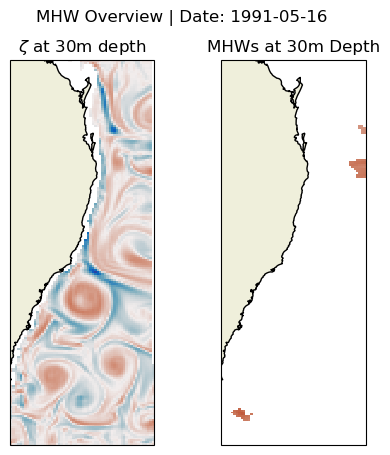

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5,5), subplot_kw={'projection':ccrs.PlateCarree()})

def update_plot(i):
    global gs, ax1, ax2
    start = 500
    i = start + i
    ax1.clear()
    ax2.clear()
    
    zeta.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=-maxvalue, vmax=maxvalue, cmap=cm.cm.balance, add_colorbar=False)
    # ax1.streamplot(x_target, y_target, u_target.isel(time=i), v_target.isel(time=i), density=0.6, color='k', transform=ccrs.PlateCarree(),
    #                 linewidth=.5, broken_streamlines=False, arrowsize=1, arrowstyle='fancy')
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    ax1.set_title('$\zeta$ at 30m depth')
    
    mhw_z30.isel(time=i).plot(ax=ax2, cmap=cm.cm.balance, vmin=-3, vmax=3, transform=ccrs.PlateCarree(), add_colorbar=False)
    ax2.add_feature(cfeature.LAND)
    ax2.coastlines()
    ax2.set_title('MHWs at 30m Depth')

    fig.suptitle(f'MHW Overview | Date: {str(zeta.time[i].values)[:10]}')


   

ani = animation.FuncAnimation(fig, update_plot, frames=1000, interval=100, blit=False)

In [63]:
HTML(ani.to_jshtml())

In [65]:
%%time
ani.save('/g/data/v45/jr5971/notebooks/figures/mhw_overview_1000.mp4', writer='ffmpeg', fps=50)

CPU times: user 8min 22s, sys: 1min 22s, total: 9min 45s
Wall time: 8min 1s


## Vertical Slices

In [38]:
v_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/v_om2_mooring.nc')
sal_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/sal_om2_mooring.nc')
temp_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/temp_om2_mooring.nc')

In [39]:
eddy_idx = {'W':-210, 'E':-204, 'S':-40, 'N':-24}
mooring_idx = {'lon':[153.771-360, 155.3-360], 'lat':-27.3}
mooring_ext = {'lon':[mooring_idx['lon'][0]-1, mooring_idx['lon'][1]+1], 'lat':-27.3}

CPU times: user 1.49 s, sys: 254 ms, total: 1.74 s
Wall time: 1.68 s


(-220.0, -194.0)

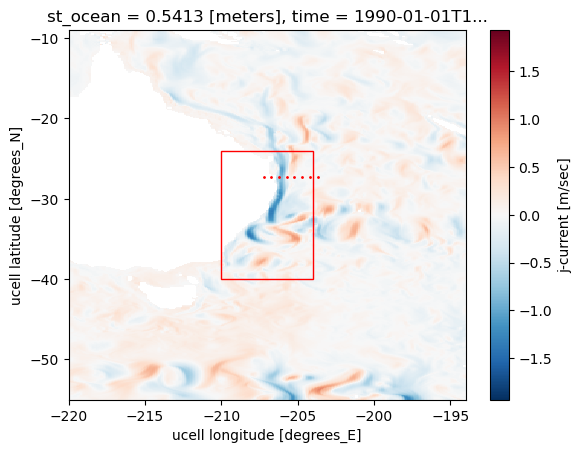

In [12]:
%%time
# Quick plot to show the rough location
# fig, ax = plt.subplots()
# om2_v['v'].isel(st_ocean=0, time=0).plot(ax=ax)
# eddy_box = patches.Rectangle((eddy_idx['W'], eddy_idx['S']), (eddy_idx['E']-eddy_idx['W']),
#                              (eddy_idx['N']-eddy_idx['S']), color='r', fill=None)
# array = np.linspace(mooring_ext['lon'][0], mooring_ext['lon'][1], 8)
# ax.scatter(array, [eac_mooring['lat']]*len(array), color='r', marker='o', s=1)
# ax.add_patch(eddy_box)
# ax.set_ylim(eddy_idx['S']-15, eddy_idx['N']+15)
# ax.set_xlim(eddy_idx['W']-10, eddy_idx['E']+10)

Okay so let's go with that transect for the depth slice. It's +- one degree of longitude.

So, now we are subsetting all three variables and saving these to disk. 

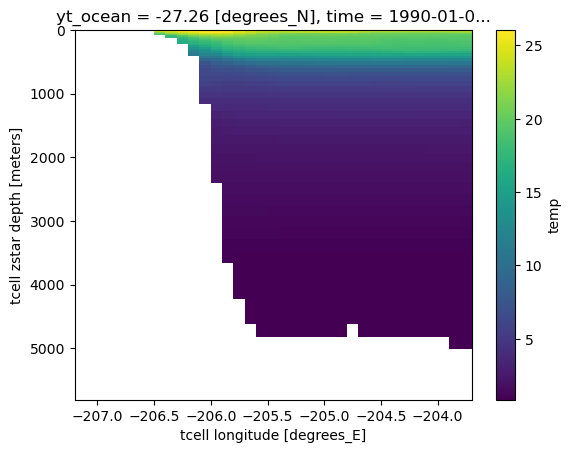

In [51]:
temp_slice.isel(time=0).plot()
plt.gca().invert_yaxis()

Just a quick note here - We're likely only interested in the top 2000 metres but it might be interesting just to see whether any deeper events do pop out. 

#### Depth-slice analysis

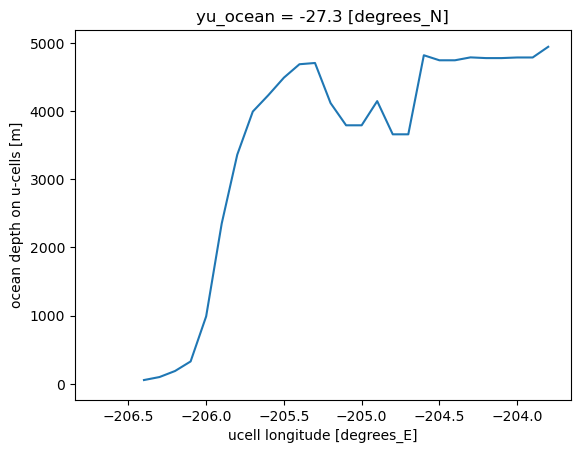

In [40]:
hu = xr.open_dataarray(access+'output000/ocean/ocean-2d-hu.nc')
hu_slice = hu.sel(xu_ocean=slice(mooring_ext['lon'][0], mooring_ext['lon'][1])).sel(
    yu_ocean=mooring_ext['lat'], method='nearest')
hu_slice.plot()

In [41]:
import gsw

In [42]:
# calculate potential density
## Firstly calculate pressure from depth
P = gsw.p_from_z(-temp_slice.st_ocean, temp_slice.yt_ocean)
# Calculate Absolute Salinity from Practical Salinity
SA = gsw.SA_from_SP(sal_slice, P, temp_slice.xt_ocean, temp_slice.yt_ocean)
## Use Absolute Salinity and Conservative Temperature to determine potential density
rho_p = gsw.sigma1(SA, temp_slice)
rho_p

<xarray.DataArray 'salt' (time: 10957, st_ocean: 75, xt_ocean: 35)>
array([[[        nan,         nan,         nan, ..., 28.63640716,
         28.63372144, 28.62343005],
        [        nan,         nan,         nan, ..., 28.63660432,
         28.63386533, 28.62343489],
        [        nan,         nan,         nan, ..., 28.63768129,
         28.63489484, 28.62436792],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., 28.59561828,
         28.58962388, 28.57713343],
        [        nan,         nan,         nan, ..., 28.59699385,
         28.59079035, 28.57805371],
        [        nan,         nan,         nan, ..., 28.59999131,
         28.59351304, 28.58046523],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., 27.88272868,
         27.86828893, 27.85318859],
        [        nan,         nan,         nan, ..., 27.89221709,
         27.87514392, 27.85960108],
        [        nan,         nan,         nan, ..., 27.89415236,
         27.87686562, 27.86108245],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -207.1 -207.0 -206.9 ... -203.9 -203.8 -203.7
    yt_ocean  float64 -27.26
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_salinity

In [43]:
%%time
rho_p = rho_p.compute()
rho_p

CPU times: user 392 µs, sys: 139 µs, total: 531 µs
Wall time: 550 µs


<xarray.DataArray 'salt' (time: 10957, st_ocean: 75, xt_ocean: 35)>
array([[[        nan,         nan,         nan, ..., 28.63640716,
         28.63372144, 28.62343005],
        [        nan,         nan,         nan, ..., 28.63660432,
         28.63386533, 28.62343489],
        [        nan,         nan,         nan, ..., 28.63768129,
         28.63489484, 28.62436792],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., 28.59561828,
         28.58962388, 28.57713343],
        [        nan,         nan,         nan, ..., 28.59699385,
         28.59079035, 28.57805371],
        [        nan,         nan,         nan, ..., 28.59999131,
         28.59351304, 28.58046523],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., 27.88272868,
         27.86828893, 27.85318859],
        [        nan,         nan,         nan, ..., 27.89221709,
         27.87514392, 27.85960108],
        [        nan,         nan,         nan, ..., 27.89415236,
         27.87686562, 27.86108245],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -207.1 -207.0 -206.9 ... -203.9 -203.8 -203.7
    yt_ocean  float64 -27.26
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_salinity

So, now I've got density, the first plot that would be cool would be meridional velocities, with isopycnals overlaying that.

In [44]:
interm_ls = glob.glob('/g/data/v45/jr5971/mhw-analysis/mhws_mooring/temp_res/int_res*.nc')
interm_ls.sort()
interm_results = xr.open_mfdataset(interm_ls, concat_dim='depth', combine='nested').sortby('depth')
interm_results

<xarray.Dataset>
Dimensions:            (time: 10957, lon: 30, depth: 71)
Coordinates:
  * time               (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-...
  * lon                (lon) float64 -206.7 -206.6 -206.4 ... -203.8 -203.7
  * depth              (depth) float64 0.5413 1.681 2.94 ... 4.722e+03 4.919e+03
Data variables: (12/15)
    ts                 (time, depth, lon) float32 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    seas               (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    thresh             (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    bthresh            (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    events             (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    relSeas            (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    ...                 ...
    cats               (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    duration_moderate  (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    duration_strong    (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    duration_severe    (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    duration_extreme   (time, depth, lon) float64 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>
    mabs               (time, depth, lon) float32 dask.array<chunksize=(10957, 8, 30), meta=np.ndarray>

In [45]:
%%time
# get mhw anomaly (temp anomalies under mhw conditions)
mhw_mooring_om2 = interm_results['ts'] - interm_results['seas']
mhw_mooring_om2 = mhw_mooring_om2.compute()
mhw_mooring_om2

CPU times: user 434 ms, sys: 332 ms, total: 766 ms
Wall time: 808 ms


<xarray.DataArray (time: 10957, depth: 71, lon: 30)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
  * lon      (lon) float64 -206.7 -206.6 -206.4 -206.3 ... -203.9 -203.8 -203.7
  * depth    (depth) float64 0.5413 1.681 2.94 ... 4.527e+03 4.722e+03 4.919e+03

In [46]:
def plot_depth_slice(i):
    fig, (ax2, ax3) = plt.subplots(1,2, figsize=(10,4))

    # Figure 1 - velocity and isopycnals
    v_slice.isel(time=i).plot(ax=ax2, cmap=cm.cm.balance)
    # cplot = rho_p.isel(time=i).plot.contour(ax=ax2, levels=[28,28.5,29,29.5,30], colors='k')
    # # Label contours
    # plt.clabel(cplot, inline=True, fontsize=8)
    
    ax2.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax2.set_ylim(250,0)
    ax2.set_xlim(-206.4, temp_slice.xt_ocean.max().values)
    ax2.grid()
    mhw_mooring_om2.isel(time=i).plot(ax=ax3, cmap=cm.cm.balance, vmin=-3, vmax=3)
    cplot = rho_p.isel(time=i).plot.contour(ax=ax3, levels=[28,28.5,29,29.5,30], colors='k')
    # Label contours
    plt.clabel(cplot, inline=True, fontsize=8)
    ax3.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax3.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax3.set_ylim(250,0)
    ax3.set_xlim(-206.4, temp_slice.xt_ocean.max().values)
    # ax3.grid()

In [47]:
interact(plot_depth_slice, i=(0, len(v_slice.time),1))

interactive(children=(IntSlider(value=5478, description='i', max=10957), Output()), _dom_classes=('widget-inte…

<function __main__.plot_depth_slice(i)>

In [48]:
import pandas as pd

In [49]:
# Plot spatial and depth slices for the eddy dipole event...
start_time='2015-01-01'
end_time = '2017-01-01'
frames = len(pd.date_range(start_time, end_time))

In [50]:
# select data...
zeta_sub = zeta.sel(time=slice(start_time, end_time))

# spatial MHWs
mhw_z30_sub = mhw_z30.sel(time=slice(start_time, end_time))
# Depth slices
v_slice_sub = v_slice.sel(time=slice(start_time, end_time))
# u_slice_sub = u_slice.sel(time=slice(start_time, end_time))
rho_slice_sub = rho_p.sel(time=slice(start_time, end_time))
mhw_mooring_sub = mhw_mooring_om2.sel(time=slice(start_time, end_time))


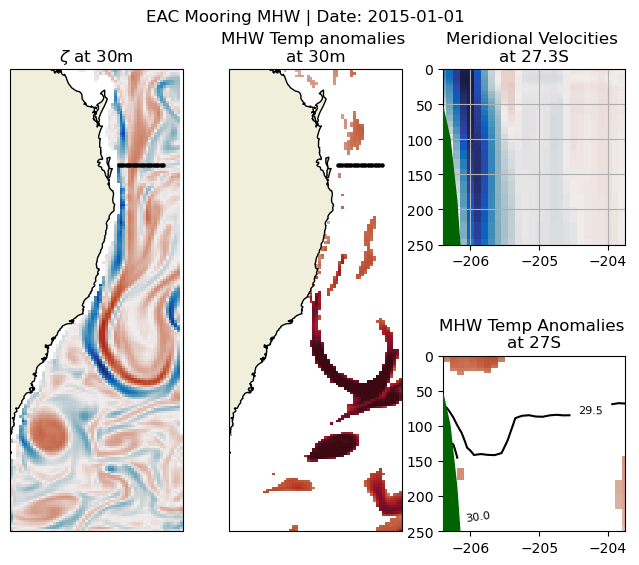

In [87]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(5,3)
# ax1 - zeta + streamlines
ax1 = fig.add_subplot(gs[:,0], projection=ccrs.PlateCarree())
# ax2 - spatial map of MHWs
ax2 = fig.add_subplot(gs[:,1], projection=ccrs.PlateCarree())
# ax3 - depth-slice of zonal velocity
ax3 = fig.add_subplot(gs[:2,2])
# ax4 - depth-slice of MHW
ax4 = fig.add_subplot(gs[3:,2])


def update_plot(i):
    global gs, ax1, ax2, ax3, ax4
    start = start_time
    # i = start + i
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()

    zeta_sub.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=-maxvalue, vmax=maxvalue, cmap=cm.cm.balance, add_colorbar=False)
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    array = np.linspace(mooring_idx['lon'][0], mooring_idx['lon'][1], 20)
    ax1.scatter(array, [mooring_idx['lat']]*len(array), color='k', marker='o', s=5, transform=ccrs.PlateCarree())
    ax1.set_title('$\zeta$ at 30m')


    
    mhw_z30_sub.isel(time=i).plot(ax=ax2, cmap=cm.cm.balance, vmin=-3, vmax=3, transform=ccrs.PlateCarree(), add_labels=False, 
                                 add_colorbar=False)
    ax2.add_feature(cfeature.LAND)
    ax2.coastlines()
    ax2.scatter(array, [mooring_idx['lat']]*len(array), color='k', marker='o', s=5, transform=ccrs.PlateCarree())
    ax2.set_title('MHW Temp anomalies \nat 30m')

    v_slice.isel(time=i).plot(ax=ax3, cmap=cm.cm.balance, add_labels=False, add_colorbar=False)
    
    ax3.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax3.set_ylim(250,0)
    ax3.set_xlim(-206.4, temp_slice.xt_ocean.max().values)
    ax3.grid()
    ax3.set_title('Meridional Velocities \nat 27.3S')
    
    mhw_mooring_sub.isel(time=i).plot(ax=ax4, cmap=cm.cm.balance, vmin=-3, vmax=3, add_labels=False, add_colorbar=False)
    cplot = rho_p.isel(time=i).plot.contour(ax=ax4, levels=[29.5,30,30.5,31,31.5], colors='k', add_labels=False)
    # Label contours
    plt.clabel(cplot, inline=True, fontsize=8)
    ax4.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax4.set_ylim(250,0)
    ax4.set_xlim(-206.4, temp_slice.xt_ocean.max().values)
    ax4.set_title('MHW Temp Anomalies \nat 27S')

    fig.suptitle(f'EAC Mooring MHW | Date: {str(zeta_sub.time[i].values)[:10]}')

ani = animation.FuncAnimation(fig, update_plot, frames=frames, interval=100, blit=False)

CPU times: user 12min 33s, sys: 1min 37s, total: 14min 10s
Wall time: 11min 39s


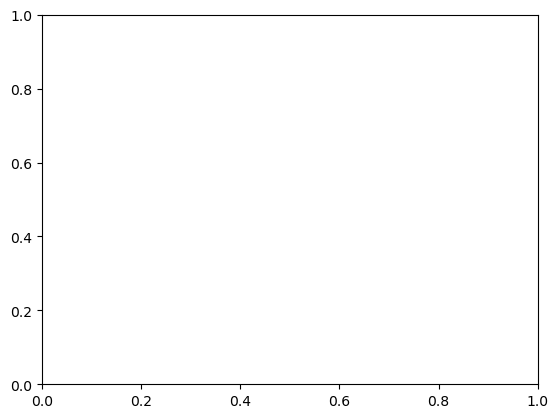

In [88]:
%%time
ani.save('/g/data/v45/jr5971/notebooks/figures/mhw_upstream.mp4', writer='ffmpeg', fps=50)

### Mooring Observations
Let's plot a similar figure to the above, but for the Observational dataset

In [51]:
eac_mooring_path = '/scratch/v45/jr5971/eac-mooring/EAC_filled-daily-distance-depth-gridded-product_20120401-20220727.nc'
eac_mooring = xr.open_dataset(eac_mooring_path)
v_obs_mooring = eac_mooring['VCUR']
v_obs_mooring

<xarray.DataArray 'VCUR' (TIME: 3770, DEPTH: 271, LONGITUDE: 124)>
[126687080 values with dtype=float64]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2012-04-01T12:00:00 ... 2022-07-27T12:00:00
  * DEPTH      (DEPTH) float64 0.0 10.0 20.0 30.0 ... 4.96e+03 4.98e+03 5e+03
  * LONGITUDE  (LONGITUDE) float64 153.6 153.6 153.6 153.6 ... 155.3 155.3 155.3
    LATITUDE   (LONGITUDE) float64 ...
Attributes:
    long_name:        northward_sea_water_velocity
    standard_name:    northward_sea_water_velocity
    units:            m s-1
    valid_min:        -10.0
    valid_max:        10.0
    reference_datum:  true north

In [52]:
import gsw

In [53]:
# calculate potential density
## Firstly calculate pressure from depth
P = gsw.p_from_z(-v_obs_mooring.DEPTH, v_obs_mooring.LATITUDE)
# Calculate Absolute Salinity from Practical Salinity
SA = gsw.SA_from_SP(eac_mooring['PSAL'], P, v_obs_mooring.LONGITUDE, v_obs_mooring.LATITUDE)
## Use Absolute Salinity and Conservative Temperature to determine potential density
rho_p_obs = gsw.sigma1(SA, eac_mooring['TEMP'])
rho_p_obs

<xarray.DataArray 'PSAL' (TIME: 3770, DEPTH: 271, LONGITUDE: 124)>
array([[[27.69041184, 27.68560631, 27.68079915, ..., 27.78824242,
         27.79946704, 27.81037061],
        [27.63562405, 27.64190822, 27.64787034, ..., 27.95323853,
         27.9624848 , 27.97684727],
        [27.58189469, 27.61865304, 27.648029  , ..., 28.05042433,
         28.047692  , 28.04224743],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[27.60924008, 27.60473892, 27.59991469, ..., 27.7923398 ,
         27.80505188, 27.81849925],
        [27.5981921 , 27.60586241, 27.612152  , ..., 27.95505249,
         27.96398426, 27.97781483],
        [27.58758015, 27.62157057, 27.64892122, ..., 28.05053584,
         28.047692  , 28.04224743],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[29.26722205, 29.25528447, 29.24333311, ..., 29.06265348,
         29.06132531, 29.06045582],
        [28.42353776, 28.49229619, 28.53680731, ..., 28.35188749,
         28.27402645, 28.12736813],
        [28.80119301, 28.77905366, 28.7568863 , ..., 28.07318675,
         28.047692  , 28.04224743],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * TIME       (TIME) datetime64[ns] 2012-04-01T12:00:00 ... 2022-07-27T12:00:00
  * DEPTH      (DEPTH) float64 0.0 10.0 20.0 30.0 ... 4.96e+03 4.98e+03 5e+03
  * LONGITUDE  (LONGITUDE) float64 153.6 153.6 153.6 153.6 ... 155.3 155.3 155.3
    LATITUDE   (LONGITUDE) float64 -27.34 -27.34 -27.34 ... -27.11 -27.11 -27.11
Attributes:
    long_name:        sea_water_practical_salinity
    standard_name:    sea_water_practical_salinity
    units:            1
    valid_min:        2.0
    valid_max:        41.0
    reference_scale:  PSS-78

In [54]:
%%time
rho_p_obs = rho_p_obs.compute()
rho_p_obs

CPU times: user 640 µs, sys: 206 µs, total: 846 µs
Wall time: 878 µs


<xarray.DataArray 'PSAL' (TIME: 3770, DEPTH: 271, LONGITUDE: 124)>
array([[[27.69041184, 27.68560631, 27.68079915, ..., 27.78824242,
         27.79946704, 27.81037061],
        [27.63562405, 27.64190822, 27.64787034, ..., 27.95323853,
         27.9624848 , 27.97684727],
        [27.58189469, 27.61865304, 27.648029  , ..., 28.05042433,
         28.047692  , 28.04224743],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[27.60924008, 27.60473892, 27.59991469, ..., 27.7923398 ,
         27.80505188, 27.81849925],
        [27.5981921 , 27.60586241, 27.612152  , ..., 27.95505249,
         27.96398426, 27.97781483],
        [27.58758015, 27.62157057, 27.64892122, ..., 28.05053584,
         28.047692  , 28.04224743],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[29.26722205, 29.25528447, 29.24333311, ..., 29.06265348,
         29.06132531, 29.06045582],
        [28.42353776, 28.49229619, 28.53680731, ..., 28.35188749,
         28.27402645, 28.12736813],
        [28.80119301, 28.77905366, 28.7568863 , ..., 28.07318675,
         28.047692  , 28.04224743],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * TIME       (TIME) datetime64[ns] 2012-04-01T12:00:00 ... 2022-07-27T12:00:00
  * DEPTH      (DEPTH) float64 0.0 10.0 20.0 30.0 ... 4.96e+03 4.98e+03 5e+03
  * LONGITUDE  (LONGITUDE) float64 153.6 153.6 153.6 153.6 ... 155.3 155.3 155.3
    LATITUDE   (LONGITUDE) float64 -27.34 -27.34 -27.34 ... -27.11 -27.11 -27.11
Attributes:
    long_name:        sea_water_practical_salinity
    standard_name:    sea_water_practical_salinity
    units:            1
    valid_min:        2.0
    valid_max:        41.0
    reference_scale:  PSS-78

In [55]:
interm_ls = glob.glob('/g/data/v45/jr5971/mhw-analysis/mhws_obs_mooring/temp_res/int_res*.nc')
interm_ls.sort()
interm_ls

ts_ls = []
clim_ls = []
for file in interm_ls:
    ds = xr.open_dataset(file)
    ts = ds['ts']
    clim = ds['seas']
    ts_ls.append(ts)
    clim_ls.append(clim)
    
# interm_results = xr.open_mfdataset(interm_ls, concat_dim='DEPTH', combine='nested').sortby('depth')
# interm_results

In [56]:
# If we are only going to around 250m depth, let's just try open and concatenate the first few data arrays
ts_concat = xr.concat(ts_ls[:3], 'depth')
clim_concat = xr.concat(clim_ls[:3], 'depth')
clim_concat

<xarray.DataArray 'seas' (time: 3770, depth: 30, lon: 124)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
         21.97020579, 21.99266289],
        [        nan,         nan,         nan, ..., 21.9693816 ,
         21.96337046, 21.95246097],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2012-04-01T12:00:00 ... 2022-07-27T12:00:00
  * lon      (lon) float64 153.6 153.6 153.6 153.6 ... 155.2 155.3 155.3 155.3
  * depth    (depth) float64 0.0 10.0 20.0 30.0 40.0 ... 260.0 270.0 280.0 290.0

In [57]:
%%time
# get mhw anomaly (temp anomalies under mhw conditions)
mhw_mooring_obs = ts_concat - clim_concat
mhw_mooring_obs = mhw_mooring_obs.compute()
mhw_mooring_obs

CPU times: user 86.3 ms, sys: 72.1 ms, total: 158 ms
Wall time: 98.1 ms


<xarray.DataArray (time: 3770, depth: 30, lon: 124)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
         1.63879421, 2.09533711],
        [       nan,        nan,        nan, ..., 2.3846184 ,
         2.46962954, 2.49553903],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2012-04-01T12:00:00 ... 2022-07-27T12:00:00
  * lon      (lon) float64 153.6 153.6 153.6 153.6 ... 155.2 155.3 155.3 155.3
  * depth    (depth) float64 0.0 10.0 20.0 30.0 40.0 ... 260.0 270.0 280.0 290.0

In [58]:
def plot_depth_slice(i):
    fig, (ax2, ax3) = plt.subplots(1,2, figsize=(10,4))

    # Figure 1 - velocity and isopycnals
    v_obs_mooring.isel(TIME=i).plot(ax=ax2, cmap=cm.cm.balance)
    # cplot = rho_p.isel(time=i).plot.contour(ax=ax2, levels=[28,28.5,29,29.5,30], colors='k')
    # # Label contours
    # plt.clabel(cplot, inline=True, fontsize=8)
    ax2.fill_between(hu_slice.xu_ocean+360, hu_slice, 3000, color='darkgreen')
    
    # ax2.fill_between(v_obs_mooring.LONGITUDE, eac_mooring['DEPTH'], 3000, color='darkgreen', zorder=3)
    ax2.set_ylim(250,0)
    ax2.set_xlim(v_obs_mooring.LONGITUDE.min().values, v_obs_mooring.LONGITUDE.max().values)
    ax2.grid()
    mhw_mooring_obs.isel(time=i).plot(ax=ax3, cmap=cm.cm.balance, vmin=-3, vmax=3)
    cplot = rho_p_obs.isel(TIME=i).plot.contour(ax=ax3, levels=[28,28.5,29,29.5,30], colors='k')
    # Label contours
    plt.clabel(cplot, inline=True, fontsize=8)
    ax3.fill_between(hu_slice.xu_ocean+360, hu_slice, 3000, color='darkgreen')
    ax3.set_ylim(250,0)
    # ax3.set_xlim(-206.4, temp_slice.xt_ocean.max().values)
    # ax3.grid()

In [59]:
interact(plot_depth_slice, i=(0, len(v_obs_mooring.TIME),1))

interactive(children=(IntSlider(value=1885, description='i', max=3770), Output()), _dom_classes=('widget-inter…

<function __main__.plot_depth_slice(i)>

In [49]:
from matplotlib import animation

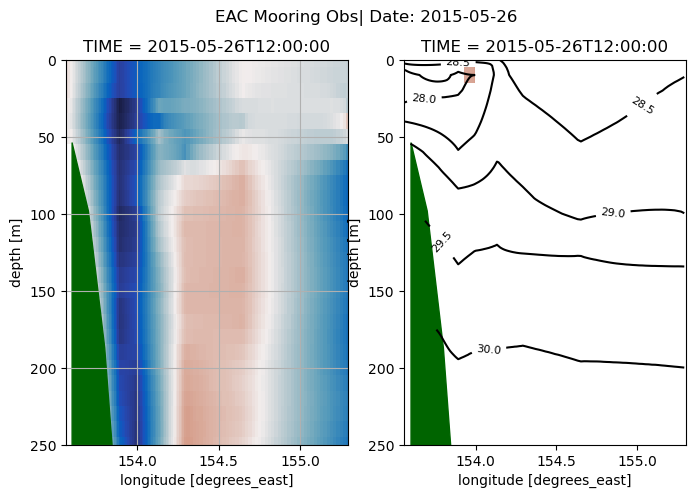

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))

def update_plot(i):
    global ax1, ax2
    start = 1150
    i = start + i
    ax1.clear()
    ax2.clear()
    
    v_obs_mooring.isel(TIME=i).plot(ax=ax1, cmap=cm.cm.balance, add_colorbar=False)
    ax1.fill_between(hu_slice.xu_ocean+360, hu_slice, 3000, color='darkgreen')
    
    # ax2.fill_between(v_obs_mooring.LONGITUDE, eac_mooring['DEPTH'], 3000, color='darkgreen', zorder=3)
    ax1.set_ylim(250,0)
    ax1.set_xlim(v_obs_mooring.LONGITUDE.min().values, v_obs_mooring.LONGITUDE.max().values)
    ax1.grid()
    mhw_mooring_obs.isel(time=i).plot(ax=ax2, cmap=cm.cm.balance, vmin=-3, vmax=3, add_colorbar=False)
    cplot = rho_p_obs.isel(TIME=i).plot.contour(ax=ax2, levels=[28,28.5,29,29.5,30], colors='k', add_colorbar=False)
    # Label contours
    plt.clabel(cplot, inline=True, fontsize=8)
    ax2.fill_between(hu_slice.xu_ocean+360, hu_slice, 3000, color='darkgreen')
    ax2.set_ylim(250,0)

    fig.suptitle(f'EAC Mooring Obs| Date: {str(v_obs_mooring.TIME[i].values)[:10]}')


   

ani = animation.FuncAnimation(fig, update_plot, frames=600, interval=100, blit=False)

CPU times: user 2min 52s, sys: 15.8 s, total: 3min 8s
Wall time: 2min 50s


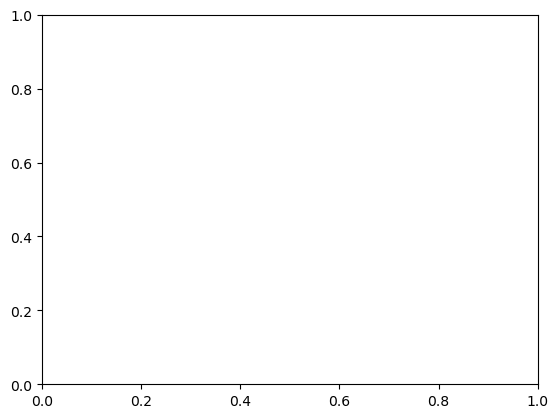

In [52]:
%%time
ani.save('/g/data/v45/jr5971/notebooks/figures/mhw_upstream_obs.mp4', writer='ffmpeg', fps=100)

**EDDY-DIPOLE ZONE (36.25S)**

In [53]:
# Import v to plot spatial map
v = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/v_om2_z30_eac.nc')
v

<xarray.DataArray 'v' (time: 10957, yu_ocean: 190, xu_ocean: 60)>
[124909800 values with dtype=float32]
Coordinates:
  * xu_ocean  (xu_ocean) float64 -210.0 -209.9 -209.8 ... -204.3 -204.2 -204.1
  * yu_ocean  (yu_ocean) float64 -39.99 -39.91 -39.84 ... -24.24 -24.15 -24.06
    st_ocean  float64 ...
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      j-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    standard_name:  sea_water_y_velocity

In [54]:
eddy_idx = {'W':-210, 'E':-204, 'S':-40, 'N':-24}
mooring_idx = {'lon':[153.771-360, 155.3-360], 'lat':-27.3}
mooring_ext = {'lon':[mooring_idx['lon'][0]-1, mooring_idx['lon'][1]+1], 'lat':-27.3}

In [55]:
dipole_idx = {'lon':[-210, 153-360], 'lat':-36.25}
dipole_idx

{'lon': [-210, -207], 'lat': -36.25}

CPU times: user 531 ms, sys: 64.4 ms, total: 595 ms
Wall time: 474 ms


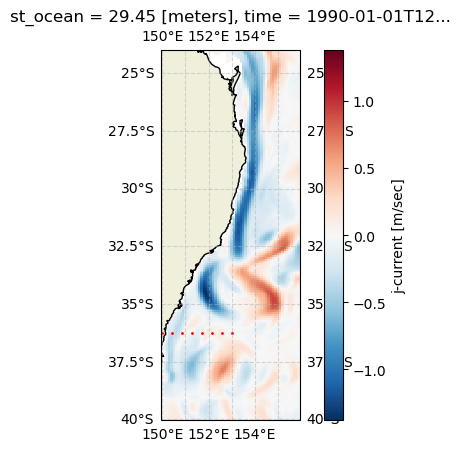

In [56]:
%%time
# Quick plot to show the rough location
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
v.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree())

array = np.linspace(dipole_idx['lon'][0], dipole_idx['lon'][1], 8)
ax.scatter(array, [dipole_idx['lat']]*len(array), color='r', marker='o', s=1, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.5, linestyle='--')

Okay so let's go with that transect for the depth slice. It's +- one degree of longitude.

So, now we are subsetting all three variables and saving these to disk. 

In [57]:
v_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/v_om2_dipole.nc')
u_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/u_om2_dipole.nc')
sal_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/sal_om2_dipole.nc')
temp_slice = xr.open_dataarray('/g/data/v45/jr5971/notebooks/data/temp_om2_dipole.nc')

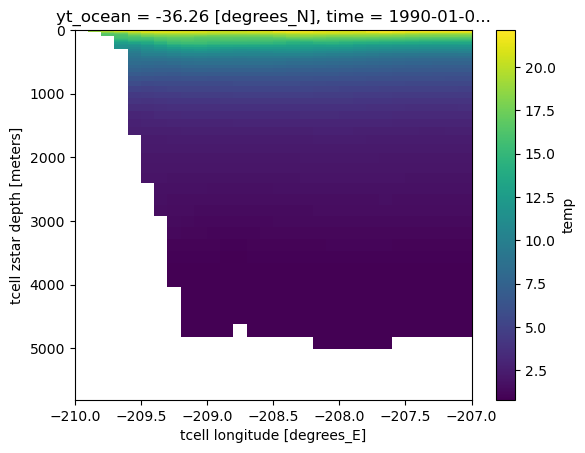

In [58]:
temp_slice.isel(time=0).plot()
plt.gca().invert_yaxis()

Just a quick note here - We're likely only interested in the top 2000 metres but it might be interesting just to see whether any deeper events do pop out. 

#### Depth-slice analysis

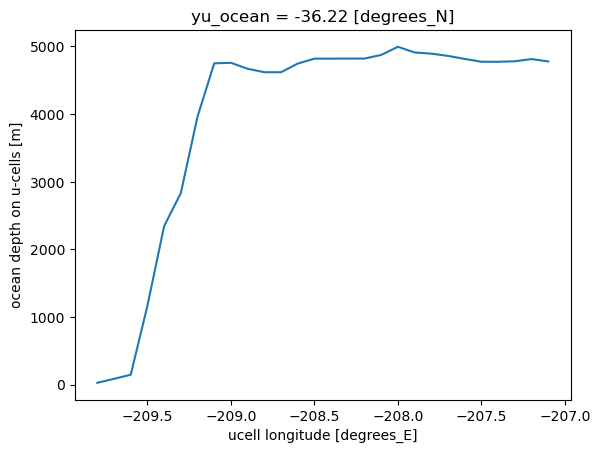

In [59]:
hu = xr.open_dataarray(access+'output000/ocean/ocean-2d-hu.nc')
hu_slice = hu.sel(xu_ocean=slice(dipole_idx['lon'][0], dipole_idx['lon'][1])).sel(
    yu_ocean=dipole_idx['lat'], method='nearest')
hu_slice.plot()

In [30]:
import gsw

In [60]:
# calculate potential density
## Firstly calculate pressure from depth
P = gsw.p_from_z(-temp_slice.st_ocean, temp_slice.yt_ocean)
# Calculate Absolute Salinity from Practical Salinity
SA = gsw.SA_from_SP(sal_slice, P, temp_slice.xt_ocean, temp_slice.yt_ocean)
## Use Absolute Salinity and Conservative Temperature to determine potential density
rho_p = gsw.sigma1(SA, temp_slice)
rho_p

<xarray.DataArray 'salt' (time: 10957, st_ocean: 75, xt_ocean: 30)>
array([[[        nan, 29.58847486, 29.35283171, ..., 28.77211849,
         28.7629511 , 28.74894558],
        [        nan, 29.5906982 , 29.35285959, ..., 28.77183766,
         28.76278258, 28.74881294],
        [        nan, 29.59453332, 29.3541759 , ..., 28.77267467,
         28.76365612, 28.74970008],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, 29.57169475, 29.28261881, ..., 28.76097874,
         28.73716278, 28.71162183],
        [        nan, 29.57529459, 29.28382364, ..., 28.76049849,
         28.73657982, 28.71099303],
        [        nan, 29.57898849, 29.28624256, ..., 28.76071712,
         28.73677829, 28.71117415],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, 29.51572677, 29.37801033, ..., 29.04597466,
         29.06800819, 29.11660624],
        [        nan, 29.51931565, 29.38054951, ..., 29.04943069,
         29.07174411, 29.12040891],
        [        nan, 29.52383308, 29.38310975, ..., 29.05228672,
         29.07494194, 29.12368737],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -207.2 -207.1 -207.0
    yt_ocean  float64 -36.26
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_salinity

In [61]:
%%time
rho_p = rho_p.compute()
rho_p

CPU times: user 326 µs, sys: 62 µs, total: 388 µs
Wall time: 400 µs


<xarray.DataArray 'salt' (time: 10957, st_ocean: 75, xt_ocean: 30)>
array([[[        nan, 29.58847486, 29.35283171, ..., 28.77211849,
         28.7629511 , 28.74894558],
        [        nan, 29.5906982 , 29.35285959, ..., 28.77183766,
         28.76278258, 28.74881294],
        [        nan, 29.59453332, 29.3541759 , ..., 28.77267467,
         28.76365612, 28.74970008],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, 29.57169475, 29.28261881, ..., 28.76097874,
         28.73716278, 28.71162183],
        [        nan, 29.57529459, 29.28382364, ..., 28.76049849,
         28.73657982, 28.71099303],
        [        nan, 29.57898849, 29.28624256, ..., 28.76071712,
         28.73677829, 28.71117415],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, 29.51572677, 29.37801033, ..., 29.04597466,
         29.06800819, 29.11660624],
        [        nan, 29.51931565, 29.38054951, ..., 29.04943069,
         29.07174411, 29.12040891],
        [        nan, 29.52383308, 29.38310975, ..., 29.05228672,
         29.07494194, 29.12368737],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -207.2 -207.1 -207.0
    yt_ocean  float64 -36.26
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_salinity

So, now I've got density, the first plot that would be cool would be meridional velocities, with isopycnals overlaying that.

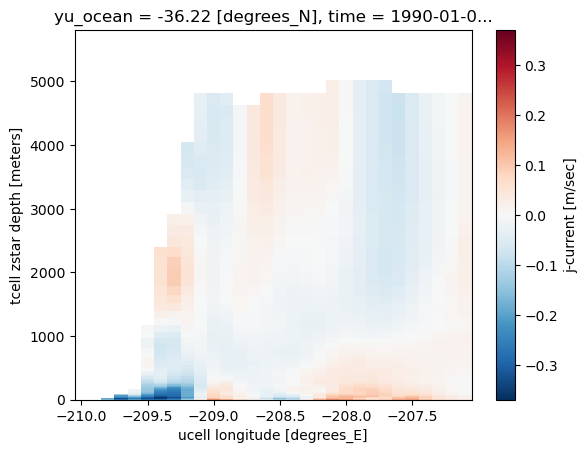

In [62]:
v_slice.isel(time=0).plot()

In [63]:
interm_ls = glob.glob('/g/data/v45/jr5971/mhw-analysis/mhws_dipole/temp_res/int_res*.nc')
interm_ls.sort()
interm_results = xr.open_mfdataset(interm_ls, concat_dim='depth', combine='nested').sortby('depth')
interm_results

<xarray.Dataset>
Dimensions:            (time: 10957, lon: 29, depth: 54)
Coordinates:
  * time               (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-...
  * lon                (lon) float64 -209.8 -209.7 -209.6 ... -207.1 -207.0
  * depth              (depth) float64 0.5413 1.681 2.94 ... 1.716e+03 1.858e+03
Data variables: (12/15)
    ts                 (time, depth, lon) float32 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    seas               (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    thresh             (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    bthresh            (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    events             (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    relSeas            (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    ...                 ...
    cats               (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    duration_moderate  (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    duration_strong    (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    duration_severe    (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    duration_extreme   (time, depth, lon) float64 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>
    mabs               (time, depth, lon) float32 dask.array<chunksize=(10957, 9, 29), meta=np.ndarray>

In [64]:
%%time
# get mhw anomaly (temp anomalies under mhw conditions)
mhw_anom_dipole = interm_results['ts'] - interm_results['seas']
mhw_anom_dipole = mhw_anom_dipole.compute()
mhw_anom_dipole

CPU times: user 693 ms, sys: 302 ms, total: 995 ms
Wall time: 2.38 s


<xarray.DataArray (time: 10957, depth: 54, lon: 29)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01T12:00:00 ... 2019-12-31T12:00:00
  * lon      (lon) float64 -209.8 -209.7 -209.6 -209.5 ... -207.2 -207.1 -207.0
  * depth    (depth) float64 0.5413 1.681 2.94 ... 1.581e+03 1.716e+03 1.858e+03

In [65]:
def plot_depth_slice_dipole(i):
    fig, (ax2, ax3) = plt.subplots(1,2, figsize=(12,3))

    # Figure 1 - velocity and isopycnals
    v_slice.isel(time=i).plot(ax=ax2, cmap=cm.cm.balance)
    # cplot = rho_p.isel(time=i).plot.contour(ax=ax2, levels=[28,28.5,29,29.5,30], colors='k')
    # # Label contours
    # plt.clabel(cplot, inline=True, fontsize=8)
    
    ax2.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax2.set_ylim(250,0)
    ax2.set_xlim(temp_slice.xt_ocean.min().values+0.15, temp_slice.xt_ocean.max().values)
    ax2.grid()
    mhw_anom_dipole.isel(time=i).plot(ax=ax3, cmap=cm.cm.balance, vmin=-3, vmax=3)
    cplot = rho_p.isel(time=i).plot.contour(ax=ax3, levels=[29.5,30,30.5,31,31.5], colors='k')
    # Label contours
    plt.clabel(cplot, inline=True, fontsize=8)
    ax3.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax3.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax3.set_ylim(250,0)
    ax3.set_xlim(temp_slice.xt_ocean.min().values+0.15, temp_slice.xt_ocean.max().values)
    # ax3.grid()

In [66]:
interact(plot_depth_slice_dipole, i=(0, len(v_slice.time),1))

interactive(children=(IntSlider(value=5478, description='i', max=10957), Output()), _dom_classes=('widget-inte…

<function __main__.plot_depth_slice_dipole(i)>

In [67]:
import pandas as pd

In [68]:
# Plot spatial and depth slices for the eddy dipole event...
start_time='1991-05-01'
end_time = '1991-08-01'
frames = len(pd.date_range(start_time, end_time))

In [72]:
# select data...
zeta_sub = zeta.sel(time=slice(start_time, end_time))
# spatial MHWs
mhw_z30_sub = mhw_z30.sel(time=slice(start_time, end_time))
# Depth slices
u_slice_sub = u_slice.sel(time=slice(start_time, end_time))
rho_slice_sub = rho_p.sel(time=slice(start_time, end_time))
mhw_dipole_sub = mhw_anom_dipole.sel(time=slice(start_time, end_time))


Okay, so in order to make the next animation we have to load in quite a few variables...

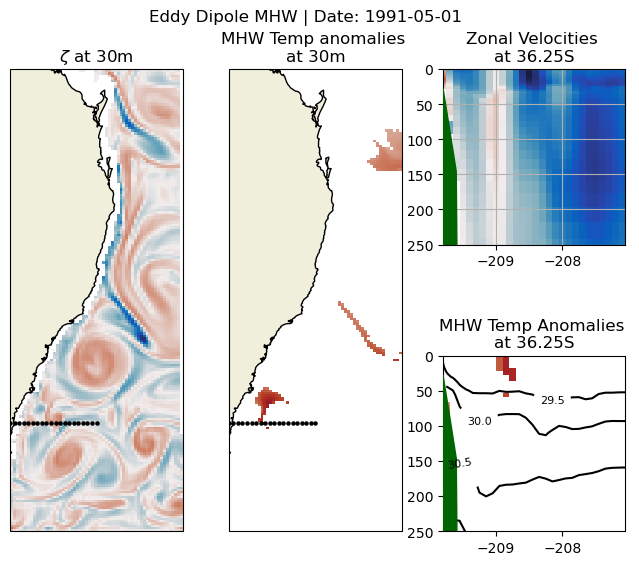

In [73]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(5,3)
# ax1 - zeta + streamlines
ax1 = fig.add_subplot(gs[:,0], projection=ccrs.PlateCarree())
# ax2 - spatial map of MHWs
ax2 = fig.add_subplot(gs[:,1], projection=ccrs.PlateCarree())
# ax3 - depth-slice of zonal velocity
ax3 = fig.add_subplot(gs[:2,2])
# ax4 - depth-slice of MHW
ax4 = fig.add_subplot(gs[3:,2])

frames = len(pd.date_range(start_time, end_time))

def update_plot(i):
    global gs, ax1, ax2, ax3, ax4
    start = start_time
    # i = start + i
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()

    zeta_sub.isel(time=i).plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=-maxvalue, vmax=maxvalue, cmap=cm.cm.balance, add_colorbar=False)
    
    ax1.add_feature(cfeature.LAND)
    ax1.coastlines()
    array = np.linspace(dipole_idx['lon'][0], dipole_idx['lon'][1], 20)
    ax1.scatter(array, [dipole_idx['lat']]*len(array), color='k', marker='o', s=5, transform=ccrs.PlateCarree())
    ax1.set_title('$\zeta$ at 30m')


    
    mhw_z30_sub.isel(time=i).plot(ax=ax2, cmap=cm.cm.balance, vmin=-3, vmax=3, transform=ccrs.PlateCarree(), add_labels=False, 
                                 add_colorbar=False)
    ax2.add_feature(cfeature.LAND)
    ax2.coastlines()
    ax2.scatter(array, [dipole_idx['lat']]*len(array), color='k', marker='o', s=5, transform=ccrs.PlateCarree())
    ax2.set_title('MHW Temp anomalies \nat 30m')

    u_slice.isel(time=i).plot(ax=ax3, cmap=cm.cm.balance, add_labels=False, add_colorbar=False)
    # cplot = rho_p.isel(time=i).plot.contour(ax=ax2, levels=[28,28.5,29,29.5,30], colors='k')
    # # Label contours
    # plt.clabel(cplot, inline=True, fontsize=8)
    
    ax3.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax3.set_ylim(250,0)
    ax3.set_xlim(temp_slice.xt_ocean.min().values+0.15, temp_slice.xt_ocean.max().values)
    ax3.grid()
    ax3.set_title('Zonal Velocities \nat 36.25S')
    
    mhw_dipole_sub.isel(time=i).plot(ax=ax4, cmap=cm.cm.balance, vmin=-3, vmax=3, add_labels=False, add_colorbar=False)
    cplot = rho_p.isel(time=i).plot.contour(ax=ax4, levels=[29.5,30,30.5,31,31.5], colors='k', add_labels=False)
    # Label contours
    plt.clabel(cplot, inline=True, fontsize=8)
    ax4.fill_between(hu_slice.xu_ocean, hu_slice, 3000, color='darkgreen', zorder=3)
    ax4.set_ylim(250,0)
    ax4.set_xlim(temp_slice.xt_ocean.min().values+0.15, temp_slice.xt_ocean.max().values)
    ax4.set_title('MHW Temp Anomalies \nat 36.25S')

    fig.suptitle(f'Eddy Dipole MHW | Date: {str(zeta_sub.time[i].values)[:10]}')

ani = animation.FuncAnimation(fig, update_plot, frames=frames, interval=100, blit=False)

In [55]:
# Increase the memory limit for the animation
import matplotlib as mpl
from IPython.display import HTML
mpl.rcParams['animation.embed_limit'] = 100.0 # MiB

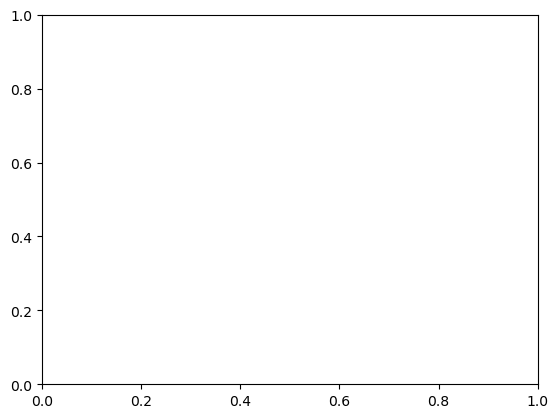

In [85]:
HTML(ani.to_jshtml())

**Saving the animations**

In [ ]:
%%time
ani.save('/g/data/v45/jr5971/notebooks/figures/eddy-dipole_new.mp4', writer='ffmpeg', fps=200)

Okay, so this is really cool - but what would be really interesting is to tie this to some events that I've found in the z30 MHW data. Then create an animation of the horizontal and vertical structure for particular events. 

## 2.1 STHPAC-01
Note that the below code will change as we are now subsetting on Setonix and moving over the smaller amount of data so we don't need to do any spatial subsetting here.

In [ ]:
### for STHPAC
u_files = get_mom6_files(years='all', input_vars=['u'])
v_files = get_mom6_files(years='all', input_vars=['v'])
u = xr.open_mfdataset(u_files)['uo']
v = xr.open_mfdataset(v_files)['vo']
vel = xr.merge([u,v])
vel

**Using xgcm**

In [ ]:
# Check for symmetry in the native c-grid
corner = [np.round(vel.xq.min().values,2), np.round(vel.yq.min().values,2)]
centre = [np.round(vel.xh.min().values,2), np.round(vel.yh.min().values,2)]

if corner[0] < centre[0]:
    print(f'Native C-grid is symmetric - most south-western point is a corner.\nMight need to drop this corner point?')
else:
    print(f'Native C-grid is antisymmetric - most south-western point is a centre.')

In [ ]:
# If grids are symmetric, drop corner point


In [ ]:
def make_grid_antisymmetric(da):
    '''
    Checks if native MOM6 grid is symmetric or antisymmetric. 
    XGCM requires grid to be antisymmetric - i.e., left-most col and
    bottom-row to be a centre point
    '''
    corner = [np.round(da.xq.min().values,2), np.round(da.yq.min().values,2)]
    centre = [np.round(da.xh.min().values,2), np.round(da.yh.min().values,2)]
    # Check if grid is symmetric
    if corner[0] < centre[0]:
        print(f'Native C-grid is symmetric - most south-western point is a corner.\nDropping left-col/bottom-row')
        da = da.isel(xq=slice(1,len(da.xq)))
        da = da.isel(yq=slice(1,len(da.yq)))
    else:
        print(f'Native C-grid is antisymmetric - most south-western point is a centre.')
    return da

In [ ]:
vel = make_grid_antisymmetric(vel)